In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns#visualization
import matplotlib.pyplot as plt#visualization
import plotly.graph_objects as go#visualization
import plotly.offline as py#visualization
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# 1. Understanding Data

In [2]:
df = pd.read_csv('loan.csv')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## 1.1 Overview of the data

In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  39717
Columns  :  111

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'ope




## 1.2 Classifying  Attributes

- Attributes can classified as demographic variables, loan characteristics variable and costumer behavior variables.


- As costumer behavior data for a new applicant will be unavailable, we do not need these data for this analysis and hence can be removed.

In [4]:
#creating a new dataframe without the costumer behavior data
columns_to_drop=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','collection_12_months_ex_med','chargeoff_within_12_mths','revol_bal','revol_util','url','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
df1=df[[column for column in df.columns if column not in columns_to_drop]]
df1.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 89 columns]

In [5]:
print ("Rows     : " ,df1.shape[0])
print ("Columns  : " ,df1.shape[1])
print ("\nFeatures : \n" ,df1.columns.tolist())
print ("\nMissing values :  ", df1.isnull().sum().values.sum())
print ("\nUnique values :  \n",df1.nunique())

Rows     :  39717
Columns  :  89

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec', 'initial_list_status', 'next_pymnt_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo

# 2. Data Cleaning and Manipulation

## 2.1 Missing Values

<AxesSubplot:>

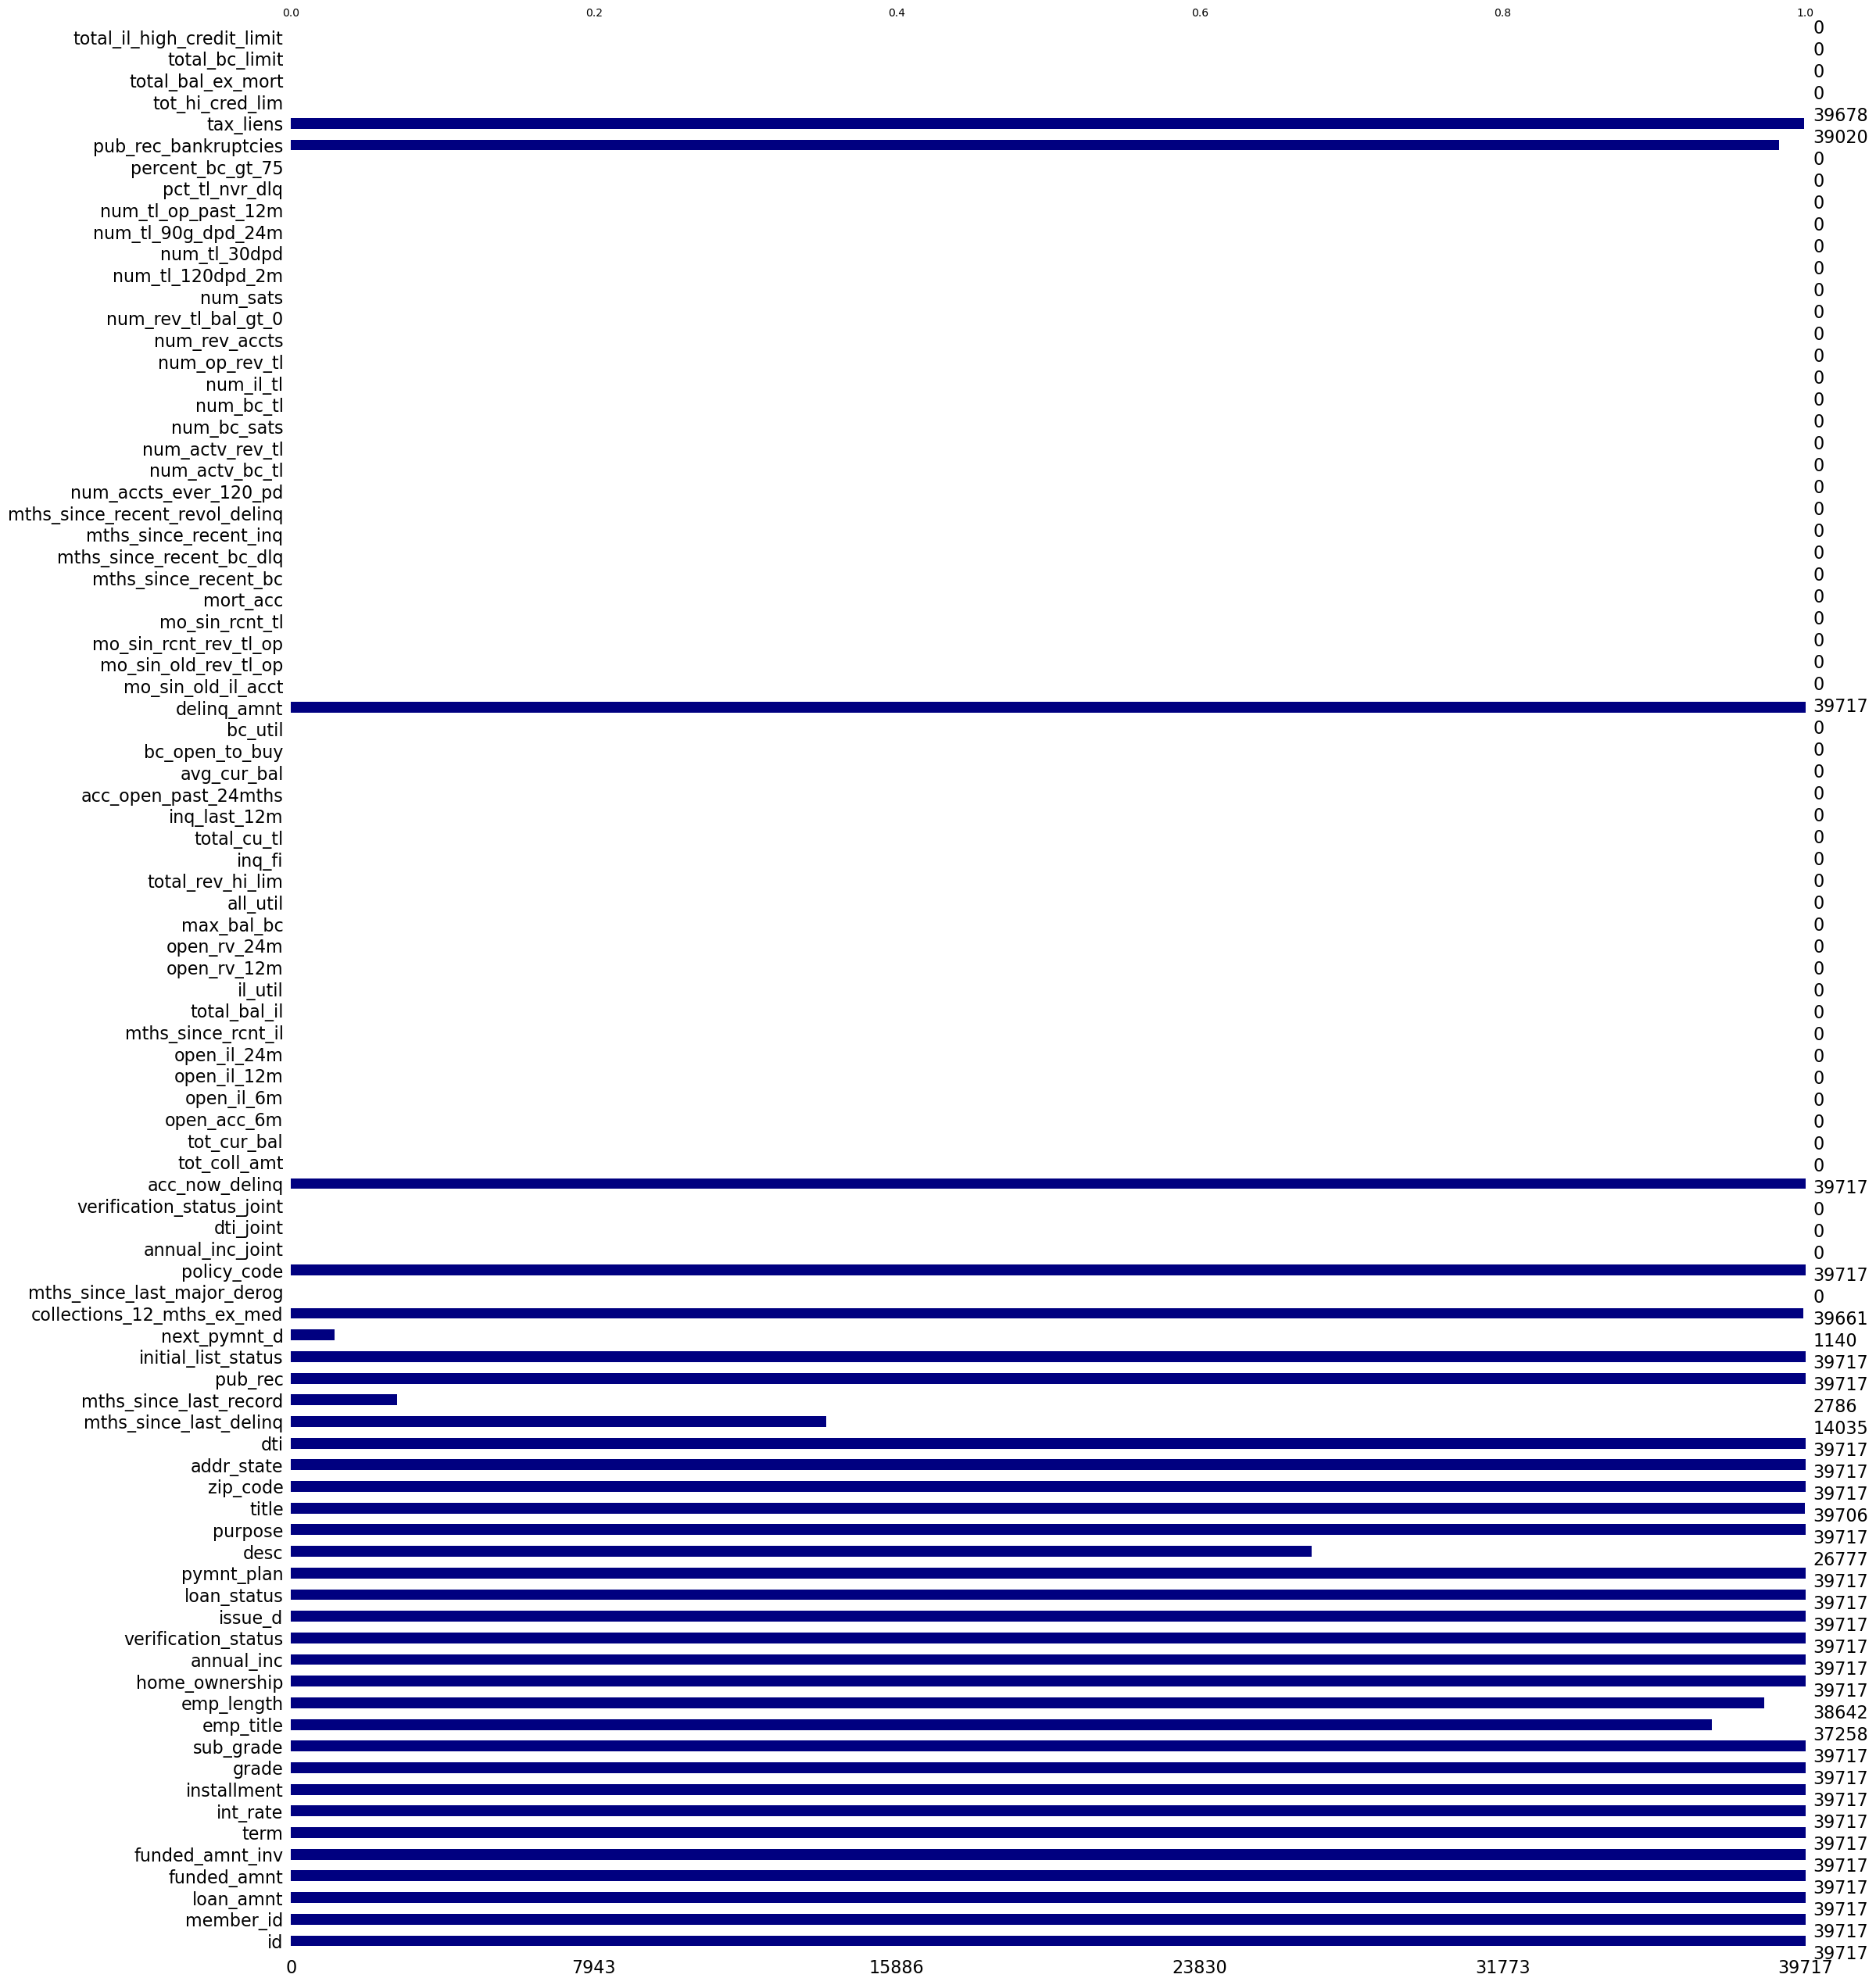

In [6]:
#visualizing not null values as bar chart
msno.bar(df1,color='navy')

As we can see there are columns where no data is available. We can remove these columns.

In [7]:
#removing all columns with no values
df1 = df1.dropna(axis=1, how='all')

<AxesSubplot:>

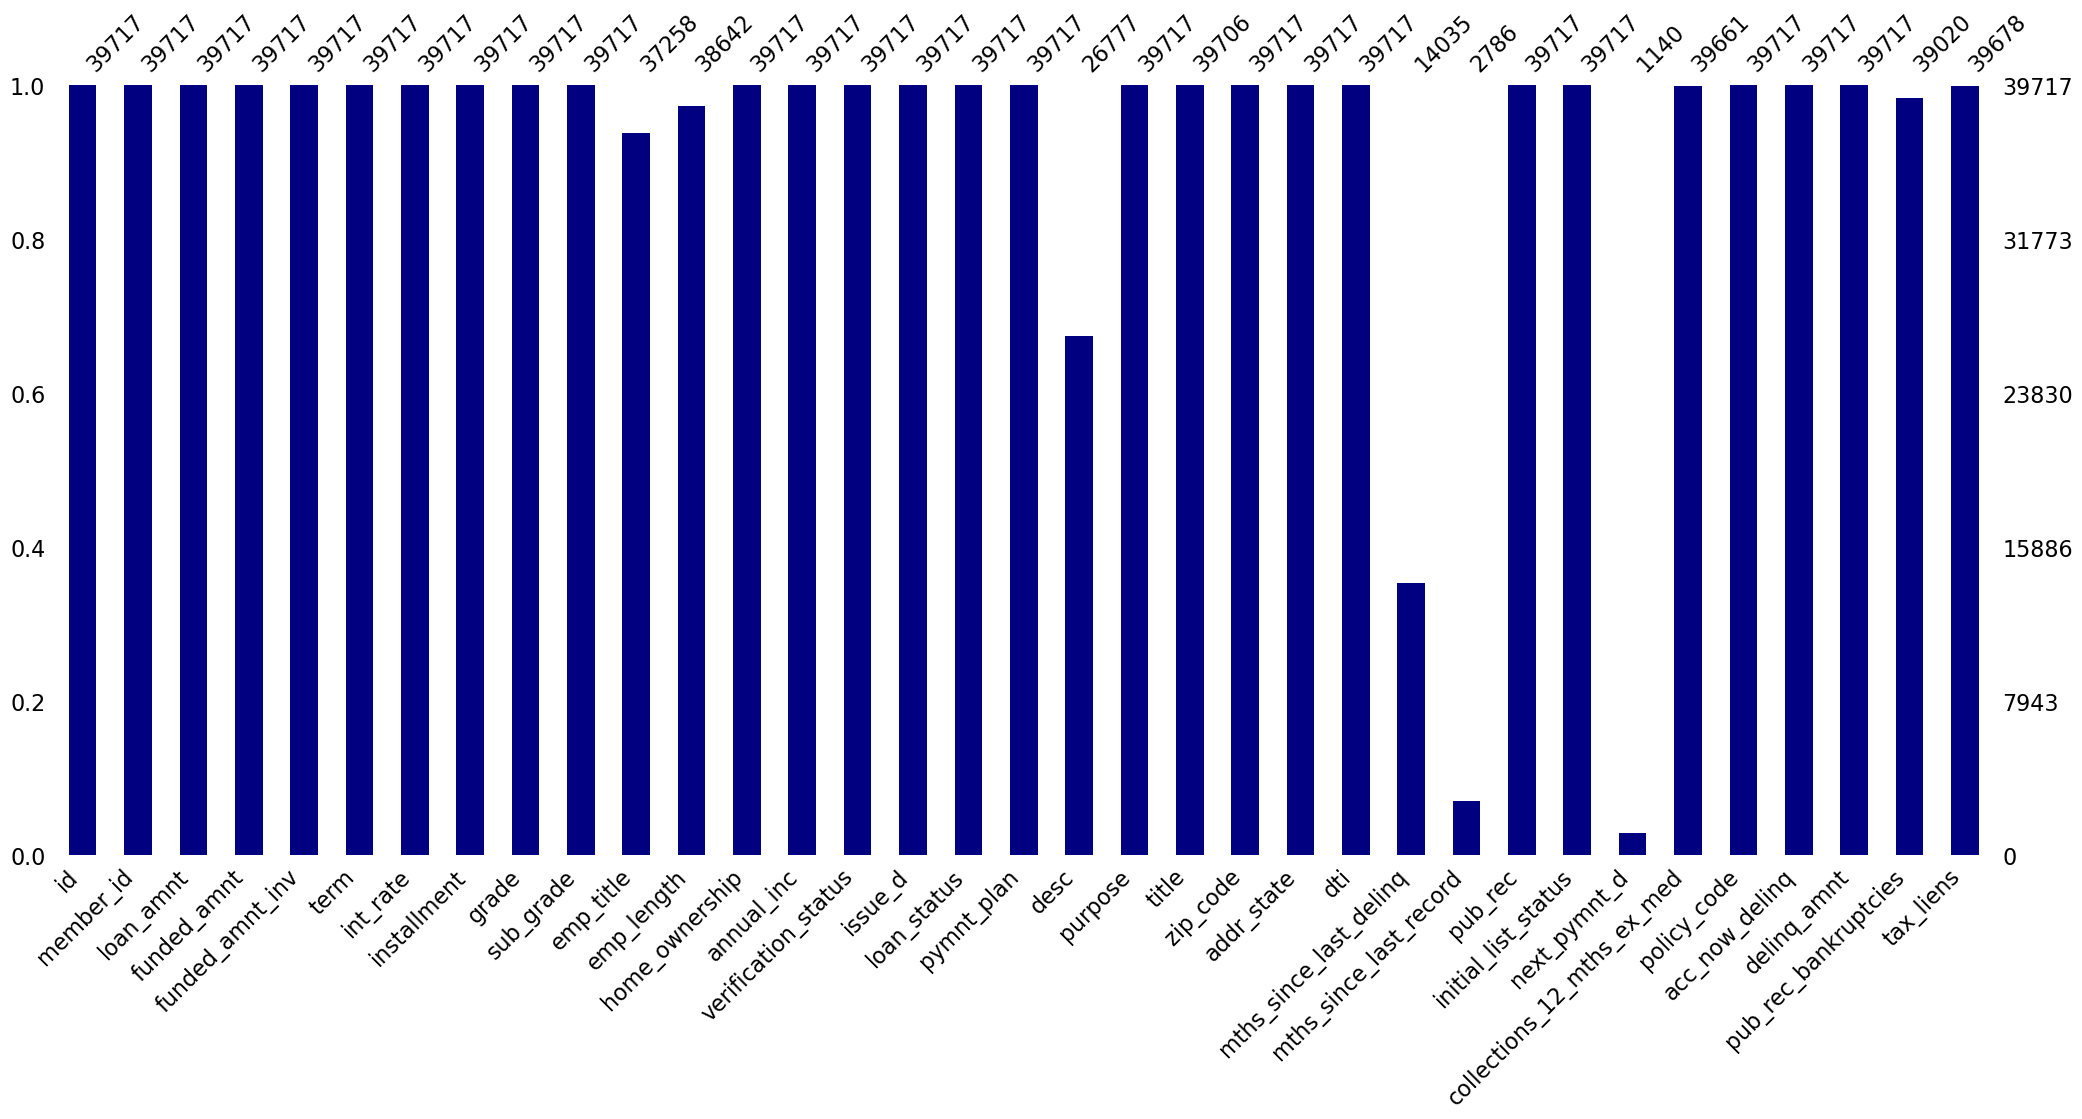

In [8]:
#visualizing not null values as bar chart again
msno.bar(df1,color='navy')

Here we can see there are some columns where less than 70% of data are available. 
We can remove all these column. 

<AxesSubplot:>

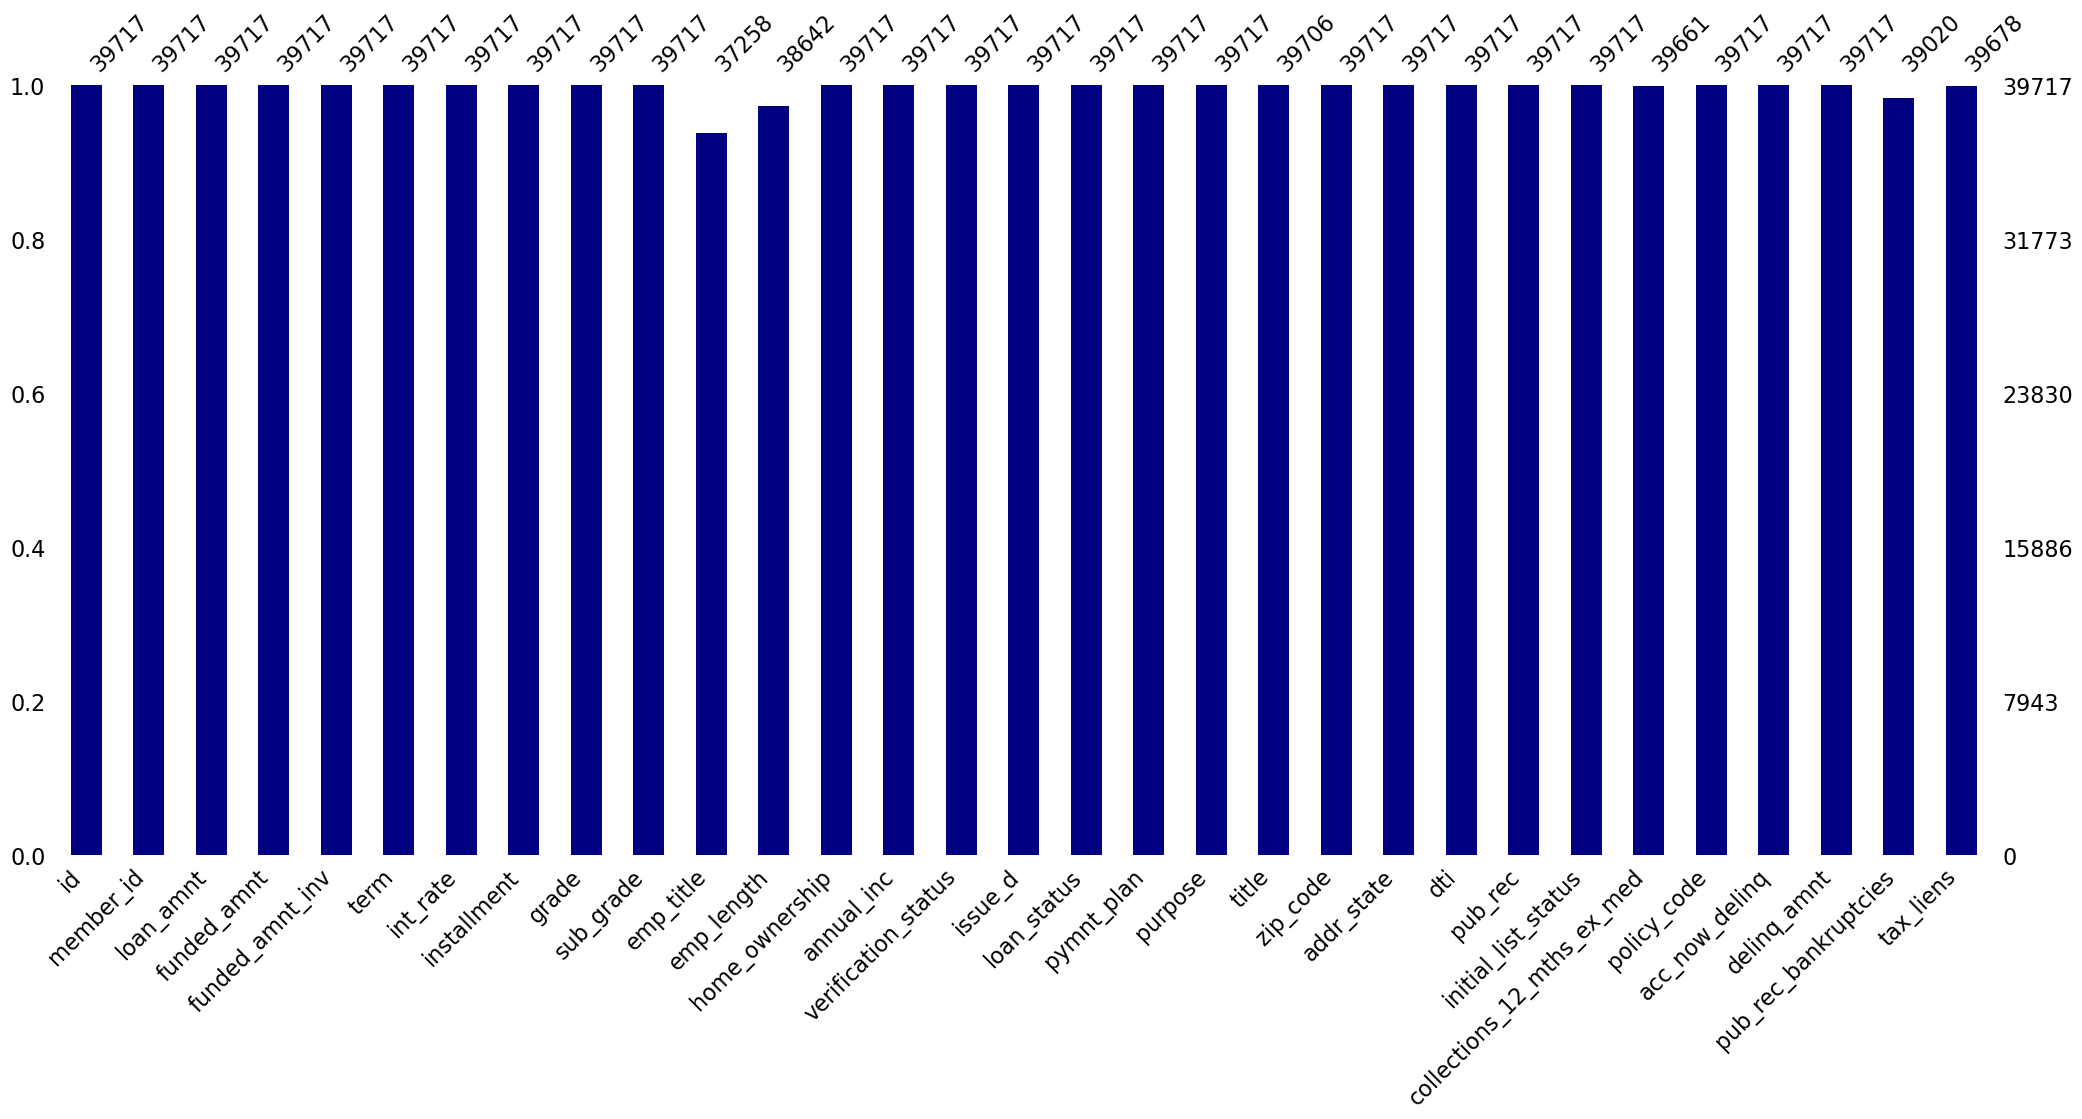

In [9]:
# removing all columns with less than 70% of data
columns_to_drop=['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d','desc']
df1=df1[[column for column in df1.columns if column not in columns_to_drop]]
msno.bar(df1,color='navy')


We can also remove the rows where some datas are missing


<AxesSubplot:>

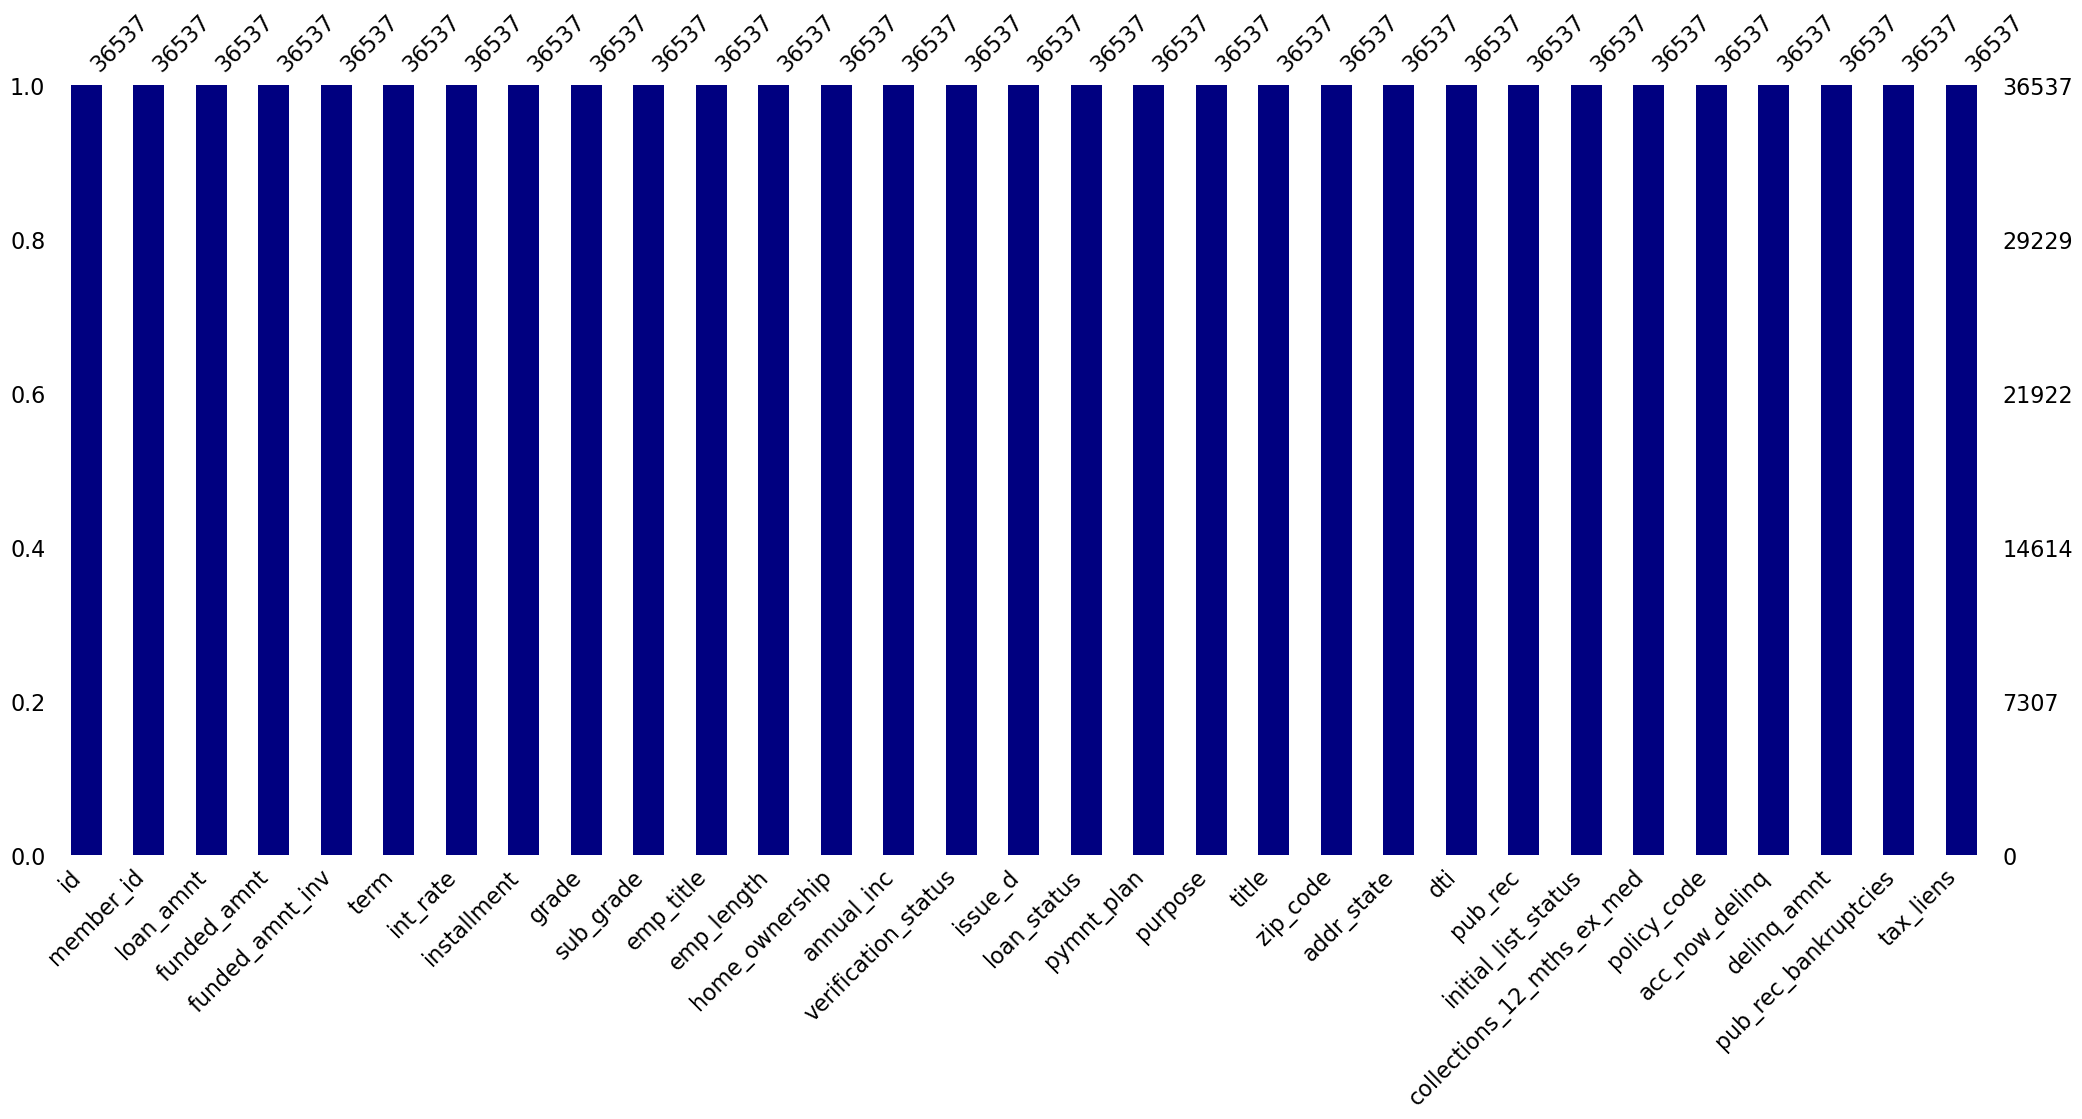

In [10]:
# removing rows with null values
df1 = df1.dropna(axis=0, how='any')
msno.bar(df1,color='navy')

In [11]:
df1.nunique()

id                            36537
member_id                     36537
loan_amnt                       864
funded_amnt                    1025
funded_amnt_inv                7482
term                              2
int_rate                        333
installment                   14402
grade                             7
sub_grade                        35
emp_title                     28291
emp_length                       11
home_ownership                    4
annual_inc                     4933
verification_status               3
issue_d                          51
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         18003
zip_code                        805
addr_state                       48
dti                            2857
pub_rec                           5
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq              

- As we can see there are some columns which have same value for every rows. These columns can be removed as they can't give any insights.

<AxesSubplot:>

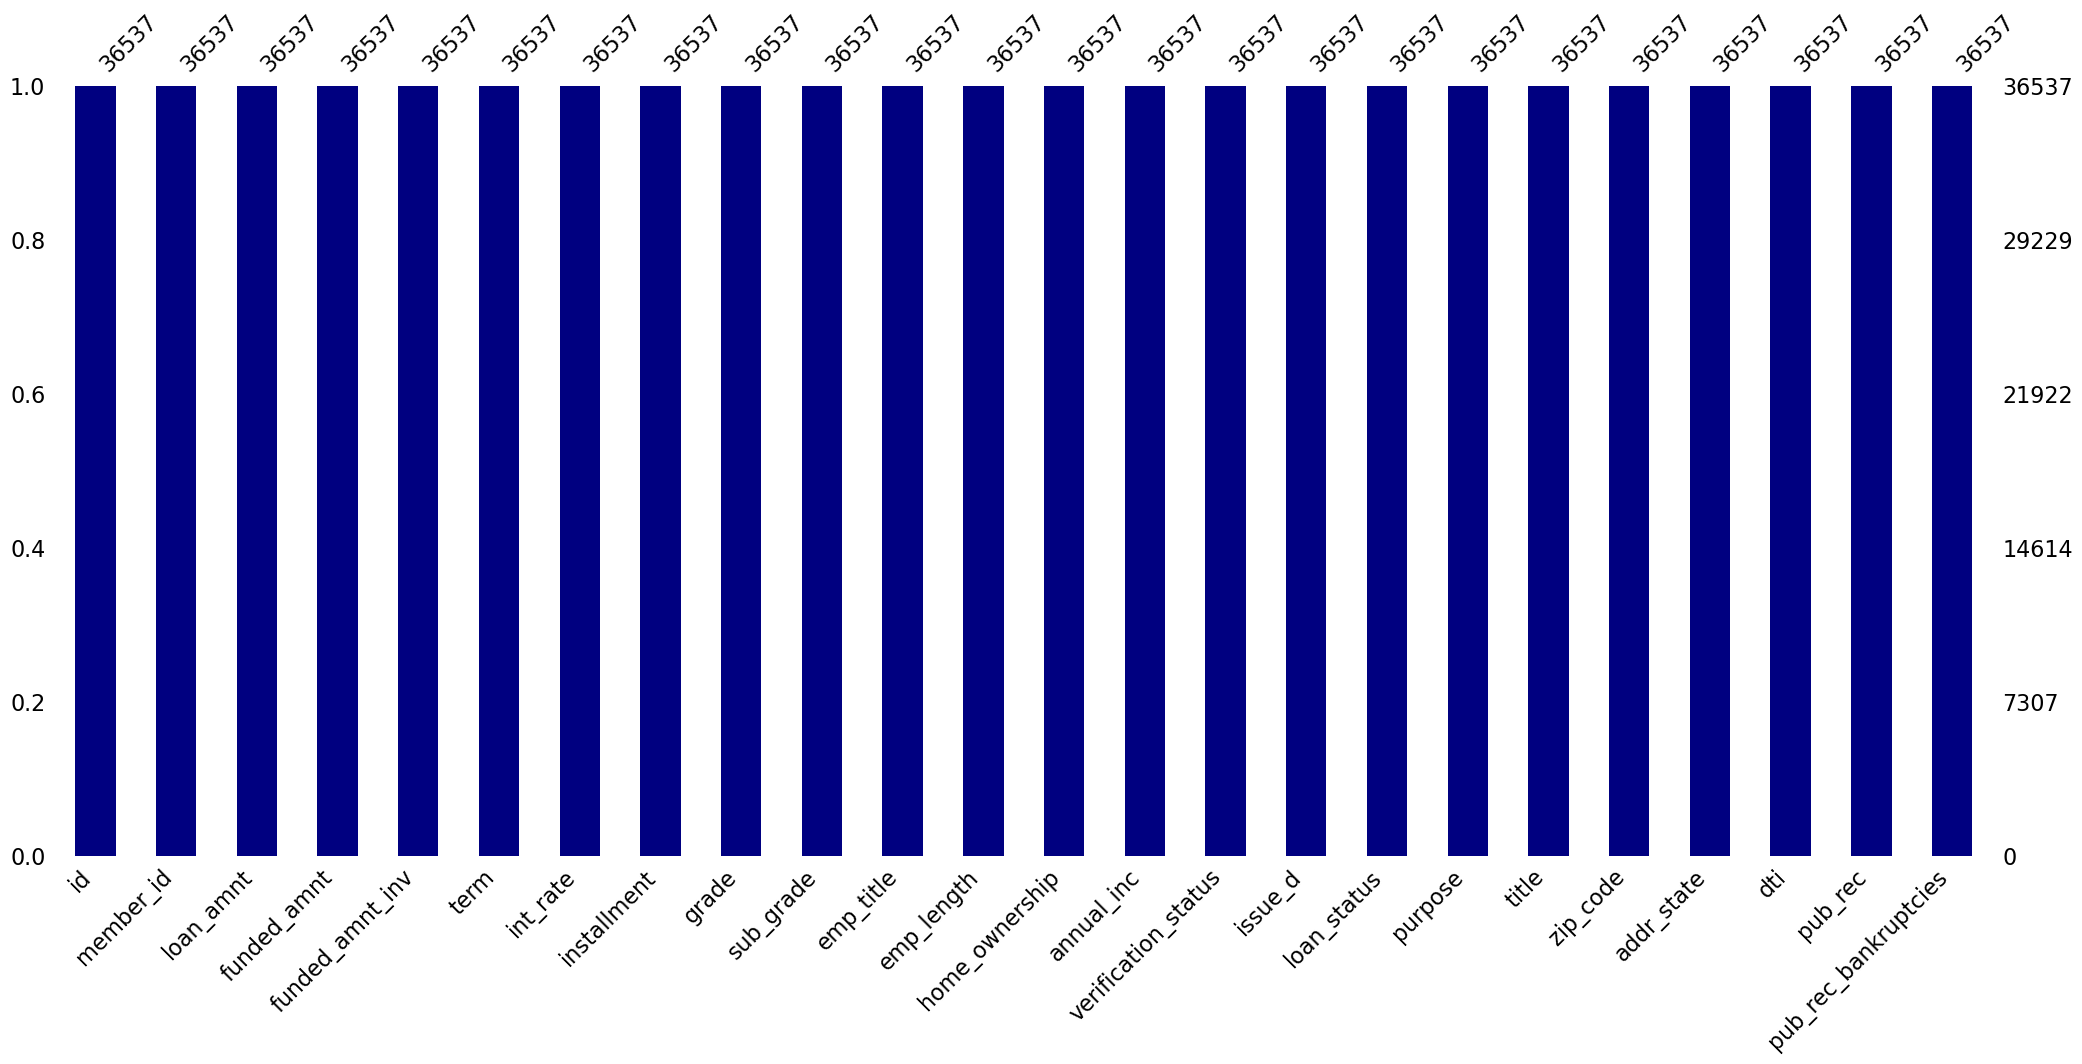

In [12]:
# removing all columns with same data
columns_to_drop=['policy_code','acc_now_delinq', 'delinq_amnt','tax_liens','collections_12_mths_ex_med','initial_list_status','pymnt_plan']
df1=df1[[column for column in df1.columns if column not in columns_to_drop]]
msno.bar(df1, color='navy')

## 2.2 Data Types

In [13]:
# getting information about the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36537 entries, 1 to 39623
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36537 non-null  int64  
 1   member_id             36537 non-null  int64  
 2   loan_amnt             36537 non-null  int64  
 3   funded_amnt           36537 non-null  int64  
 4   funded_amnt_inv       36537 non-null  float64
 5   term                  36537 non-null  object 
 6   int_rate              36537 non-null  object 
 7   installment           36537 non-null  float64
 8   grade                 36537 non-null  object 
 9   sub_grade             36537 non-null  object 
 10  emp_title             36537 non-null  object 
 11  emp_length            36537 non-null  object 
 12  home_ownership        36537 non-null  object 
 13  annual_inc            36537 non-null  float64
 14  verification_status   36537 non-null  object 
 15  issue_d            

- Interest rate and term can be converted to numeric type for future use.

In [14]:
#converting interest rate to float
df1.int_rate=df1.int_rate.apply(lambda x: x[:-1]).astype(float)


In [15]:
df1.int_rate

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39433     9.83
39475     9.01
39551    10.91
39562    10.28
39623    12.49
Name: int_rate, Length: 36537, dtype: float64

In [16]:
df1.term.value_counts()

 36 months    26463
 60 months    10074
Name: term, dtype: int64

In [17]:
#converting term to int
df1.term=df1.term.apply(lambda x: x[:-7]).astype(int)
df1.term

1        60
3        36
4        60
5        36
6        60
         ..
39433    36
39475    36
39551    36
39562    36
39623    36
Name: term, Length: 36537, dtype: int32

In [18]:
#converting sub_grade to numeric 
df1.sub_grade = pd.to_numeric(df1.sub_grade.apply(lambda x : x[-1]))
df1.sub_grade.head()

1    4
3    1
4    5
5    4
6    5
Name: sub_grade, dtype: int64

## 2.3 Outliers

In [19]:
#finding all columns that have numeric values
numeric_columns = df1.select_dtypes(include=['number']).columns
numeric_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'dti',
       'pub_rec', 'pub_rec_bankruptcies'],
      dtype='object')

There is possibility of presence of outliers in loan_amnt,funded_amnt, funded_amnt_inv, installment, annual_inc and dti columns

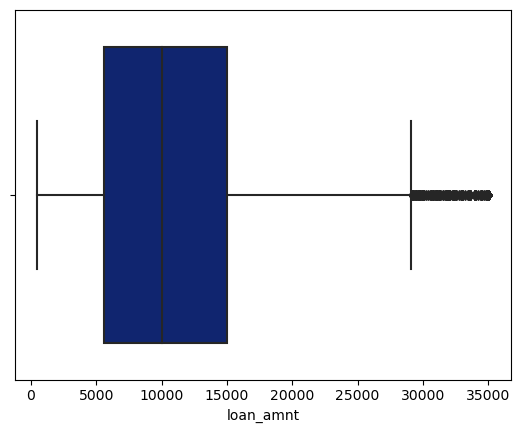

In [20]:
#Checking for outliers in loan_amnt
sns.boxplot(df1.loan_amnt,palette='dark')
plt.show()

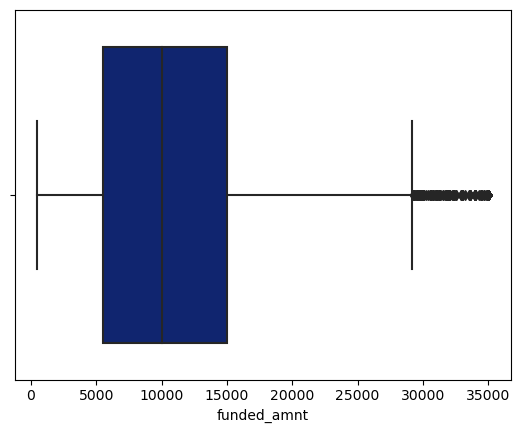

In [21]:
#Checking for outliers in funded_amnt
sns.boxplot(df1.funded_amnt,palette='dark')
plt.show()

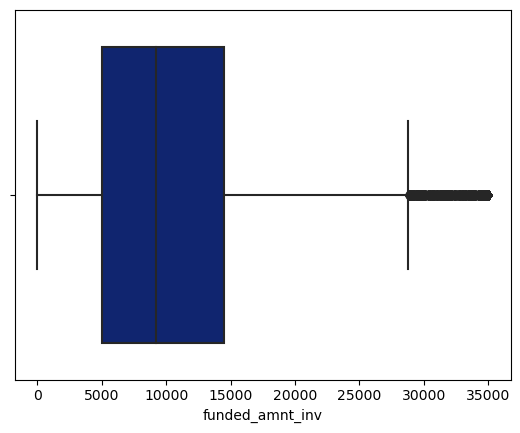

In [22]:
#Checking for outliers in funded_amnt_inv
sns.boxplot(df1.funded_amnt_inv,palette='dark')
plt.show()

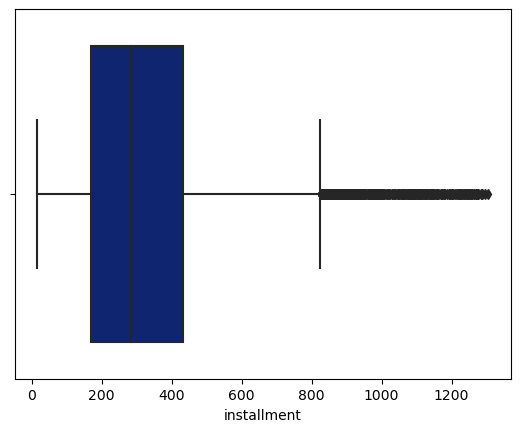

In [23]:
#Checking for outliers in installment
sns.boxplot(df1.installment,palette='dark')
plt.show()

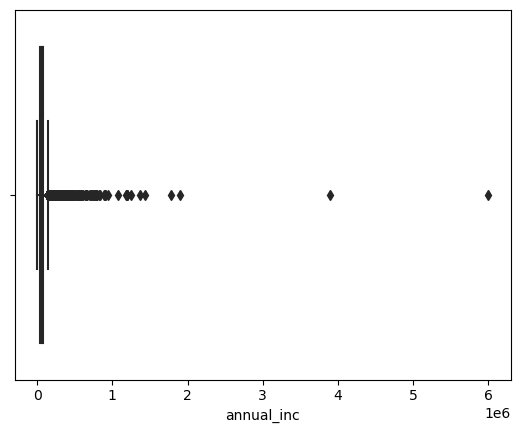

In [24]:
#Checking for outliers in annual_inc
sns.boxplot(df1.annual_inc,palette='dark')
plt.show()

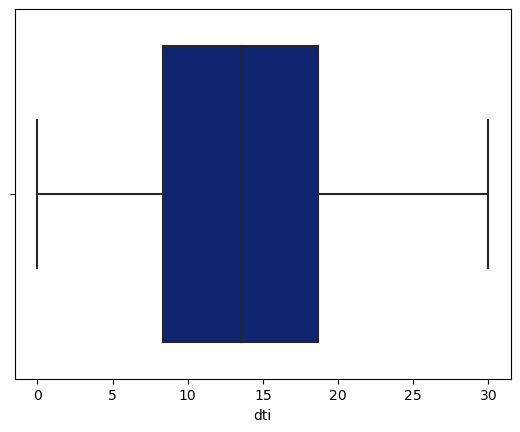

In [25]:
#Checking for outliers in dti
sns.boxplot(df1.dti,palette='dark')
plt.show()

In [26]:
loan_IQR=df1[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc']]
Q1=loan_IQR.quantile(.25)
Q3=loan_IQR.quantile(.75)
IQR=loan_IQR.quantile(.75)-loan_IQR.quantile(.25)
df1=df1.loc[~((loan_IQR< (Q1 - 1.5 * IQR)) |(loan_IQR> (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(33503, 24)

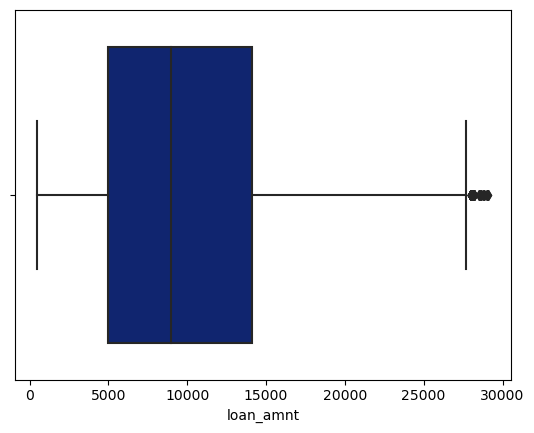

In [27]:
#Checking loan_amnt after removing outlier
sns.boxplot(df1.loan_amnt,palette='dark')
plt.show()


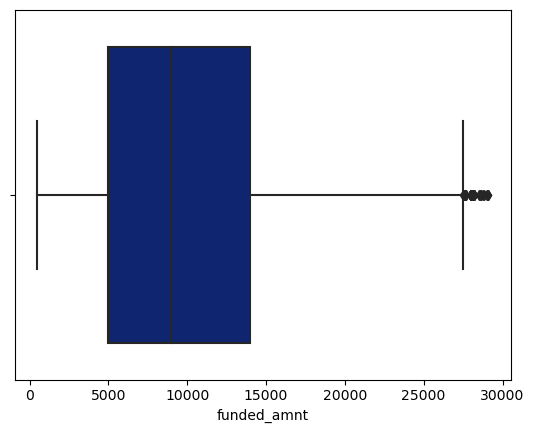

In [28]:
#Checking funded_amnt after removing outlier
sns.boxplot(df1.funded_amnt,palette='dark')
plt.show()



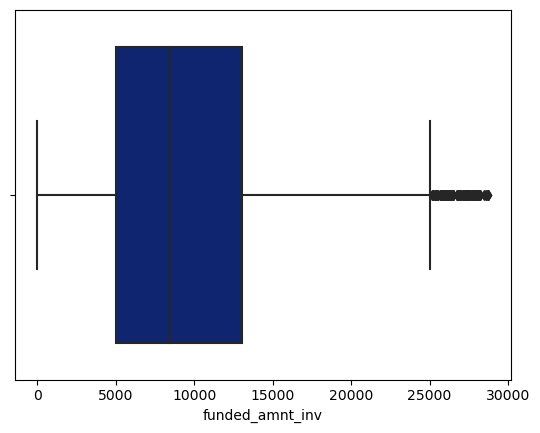

In [29]:
#Checking funded_amnt_inv after removing outlier
sns.boxplot(df1.funded_amnt_inv,palette='dark')
plt.show()



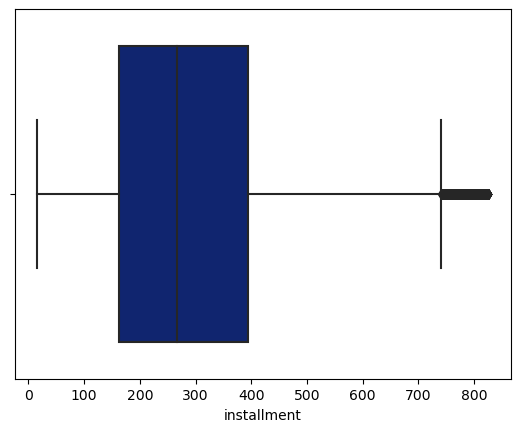

In [30]:
#Checking installment after removing outlier
sns.boxplot(df1.installment,palette='dark')
plt.show()



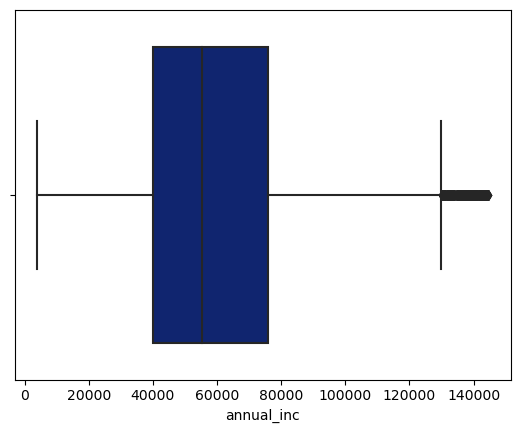

In [31]:
#Checking annual_inc after removing outlier
sns.boxplot(df1.annual_inc,palette='dark')
plt.show()



## 2.4 New Columns

- We can convert numerical values to categorical values by putting them into bins.


In [32]:
df1['installment_bucket'] = pd.cut(df1['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df1['funded_amnt_inv_bucket'] = pd.cut(df1['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
df1['loan_amnt_bucket'] = pd.cut(df1['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df1['dti_bucket'] = pd.cut(df1['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
df1['income_Bucket']=pd.qcut(df1.annual_inc,[0,0.2,0.4,0.6,0.8,1],["Very Low","Low","Average","High","Very High"])
df1['int_rate_bucket']=pd.qcut(df1.int_rate,[0,0.2,0.4,0.6,0.8,1],["Very Low","Low","Average","High","Very High"])

- We can extract month and year from the column issue_d.

In [33]:
df1['issue_d'].head()

1    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
Name: issue_d, dtype: object

In [34]:
date = df1['issue_d'].str.partition("-", True)     
df1['month']=date[0]                       
df1['year']='20' + date[2]

In [35]:
df1['month'].head()

1    Dec
3    Dec
4    Dec
5    Dec
6    Dec
Name: month, dtype: object

In [36]:
df1['year'].head()

1    2011
3    2011
4    2011
5    2011
6    2011
Name: year, dtype: object

# 3. Exploratory Data Analysis

## 3.1 The 'loan_status' column

This is the most important column for this analysis as it shows if a customer has fully paid the loan or has been charged off.

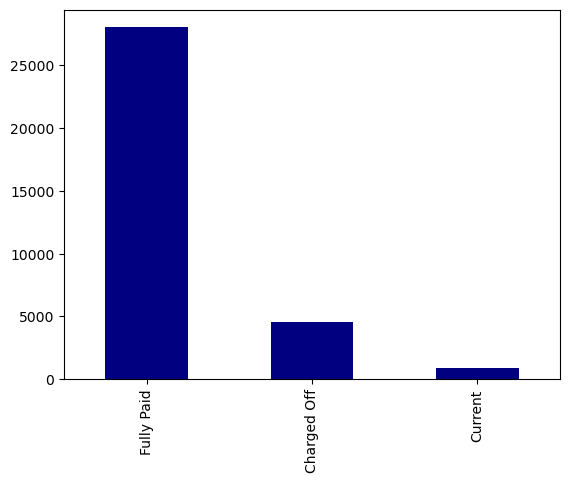

In [37]:
# visualization of loan_status
df1.loan_status.value_counts().plot.bar(color='navy')
plt.show()

- we can get rid of all rows where loan status is current. As these costumer are currently paying the installments,their data cannot be used in this analysis.


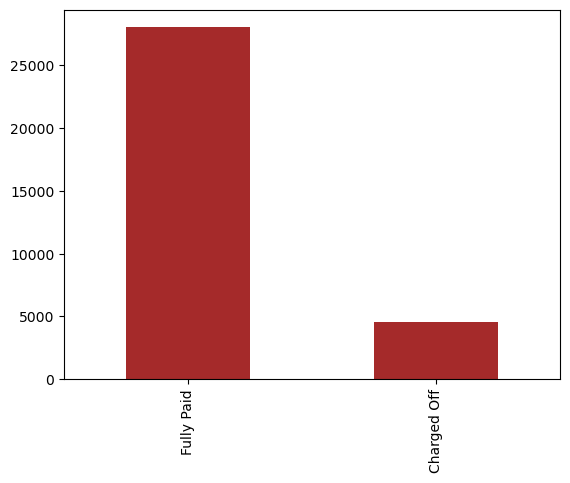

In [38]:
# removing rows where loan_status is current
df1=df1[df1.loan_status != "Current"]
df1.loan_status.value_counts().plot.bar(color='brown')
plt.show()

In [39]:
#Visualizing the percentile of defaulters and fully paid customers
#labels
lab = df1["loan_status"].value_counts().keys().tolist()
#values
val = df1["loan_status"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Loan Status ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

- 85.9% of customer paid their loan fully and 14.1% of customer defaulted.

In [40]:
# creating a new column status with value 1 if loan is fully paid and 0 otherwise 
df1["status"]= df1.loan_status.apply(lambda x: 1 if x=="Fully Paid" else 0)

## 3.2 The 'purpose' column

This column gives us idea about the purpose which was mentioned by the customer while applying the loan

In [41]:
#visualizing the proportion of fully paid to charged off over the purpose of loan.
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["purpose"].value_counts().index.values,
    y = df1[df1["status"]== 1]["purpose"].value_counts().values,marker=dict(color='navy'),
    name='fully paid',
    
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["purpose"].value_counts().index.values,
    y = df1[df1["status"]== 0]["purpose"].value_counts().values,marker=dict(color='brown'),
    name='charged off',
    
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over purpose'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [42]:
#labels
lab1 = df1.loan_status[df1["purpose"]=='renewable_energy'].value_counts().keys().tolist()
lab2 = df1.loan_status[df1["purpose"]=='educational'].value_counts().keys().tolist()
lab3 = df1.loan_status[df1["purpose"]=='house'].value_counts().keys().tolist()
lab4 = df1.loan_status[df1["purpose"]=='vacation'].value_counts().keys().tolist()
lab5 = df1.loan_status[df1["purpose"]=='moving'].value_counts().keys().tolist()
lab6 = df1.loan_status[df1["purpose"]=='medical'].value_counts().keys().tolist()
lab7 = df1.loan_status[df1["purpose"]=='wedding'].value_counts().keys().tolist()
lab8 = df1.loan_status[df1["purpose"]=='car'].value_counts().keys().tolist()
lab9 = df1.loan_status[df1["purpose"]=='major_purchase'].value_counts().keys().tolist()
lab10 = df1.loan_status[df1["purpose"]=='home_improvement'].value_counts().keys().tolist()
lab11 = df1.loan_status[df1["purpose"]=='debt_consolidation'].value_counts().keys().tolist()
lab12 = df1.loan_status[df1["purpose"]=='credit_card'].value_counts().keys().tolist()
lab13 = df1.loan_status[df1["purpose"]=='small_business'].value_counts().keys().tolist()
lab14 = df1.loan_status[df1["purpose"]=='other'].value_counts().keys().tolist()



#values
val1 = df1.loan_status[df1["purpose"]=='renewable_energy'].value_counts().values.tolist()
val2 = df1.loan_status[df1["purpose"]=='educational'].value_counts().values.tolist()
val3 = df1.loan_status[df1["purpose"]=='house'].value_counts().values.tolist()
val4 = df1.loan_status[df1["purpose"]=='vacation'].value_counts().values.tolist()
val5 = df1.loan_status[df1["purpose"]=='moving'].value_counts().values.tolist()
val6 = df1.loan_status[df1["purpose"]=='medical'].value_counts().values.tolist()
val7 = df1.loan_status[df1["purpose"]=='wedding'].value_counts().values.tolist()
val8 = df1.loan_status[df1["purpose"]=='car'].value_counts().values.tolist()
val9 = df1.loan_status[df1["purpose"]=='major_purchase'].value_counts().values.tolist()
val10 = df1.loan_status[df1["purpose"]=='home_improvement'].value_counts().values.tolist()
val11 = df1.loan_status[df1["purpose"]=='debt_consolidation'].value_counts().values.tolist()
val12 = df1.loan_status[df1["purpose"]=='credit_card'].value_counts().values.tolist()
val13 = df1.loan_status[df1["purpose"]=='small_business'].value_counts().values.tolist()
val14 = df1.loan_status[df1["purpose"]=='other'].value_counts().values.tolist()

#layout
layout = go.Layout(dict(title = "Loan Status over purpose as pie charts",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                
                       ),
                   grid=dict(rows=4,columns=4,pattern='independent'),width=1000,height=1000
                  )

fig = go.Figure(layout = layout)

#subplots
fig.add_trace(go.Pie(labels = lab1 ,
               values = val1 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Renewable energy"
              ))


fig.add_trace(go.Pie(labels = lab2 ,
               values = val2 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Educational"
              ))


fig.add_trace(go.Pie(labels = lab3 ,
               values = val3 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=2),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="House"
              ))


fig.add_trace(go.Pie(labels = lab4 ,
               values = val4 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=3),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Vacation"
              ))

fig.add_trace(go.Pie(labels = lab5 ,
               values = val5 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=1, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Moving"
              ))

fig.add_trace(go.Pie(labels = lab6 ,
               values = val6 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=1, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Medical"
              ))

fig.add_trace( go.Pie(labels = lab7 ,
               values = val7 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=1, column=2),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Wedding"
              ))



fig.add_trace(go.Pie(labels = lab8 ,
               values = val8 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=1, column=3),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Car"
              ))

fig.add_trace(go.Pie(labels = lab9 ,
               values = val9 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=2, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Major purchase"
              ))

fig.add_trace(go.Pie(labels = lab10 ,
               values = val10 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=2, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Home improvement"
              ))

fig.add_trace(go.Pie(labels = lab11 ,
               values = val11 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=2, column=2),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Debt consolidation"
              ))


fig.add_trace(go.Pie(labels = lab12 ,
               values = val12 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=2, column=3),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Credit card"
              ))

fig.add_trace(go.Pie(labels = lab13 ,
               values = val13 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=3, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Small business",
              ))

fig.add_trace(go.Pie(labels = lab14 ,
               values = val14 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=3, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="Other"
              ))


fig.show()



The above analysis shows that 26.7% of customers who applied loan for small business were charged off, followed by loans applied for Renewable energy with 18.2% , educational with 16.7% and house with 16.3% charge off percentile respectively.

## 3.3 The 'home_ownership' column

This column shows whether a customer who has applied for loan had a house of their own or not while applying for the loan

In [43]:
#First plot
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["home_ownership"].value_counts().index.values,
    y = df1[df1["status"]== 1]["home_ownership"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

#Second plot
tr1 = go.Bar(
    x = df1[df1["status"]== 0]["home_ownership"].value_counts().index.values,
    y = df1[df1["status"]== 0]["home_ownership"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over home ownership'
)


fig = go.Figure(data=data, layout=layout)


py.iplot(fig)

In [44]:
#labels
lab1 = df1.loan_status[df1["home_ownership"]=='RENT'].value_counts().keys().tolist()
lab2 = df1.loan_status[df1["home_ownership"]=='MORTGAGE'].value_counts().keys().tolist()
lab3 = df1.loan_status[df1["home_ownership"]=='OWN'].value_counts().keys().tolist()
lab4 = df1.loan_status[df1["home_ownership"]=='OTHER'].value_counts().keys().tolist()

#values
val1 = df1.loan_status[df1["home_ownership"]=='RENT'].value_counts().values.tolist()
val2 = df1.loan_status[df1["home_ownership"]=='MORTGAGE'].value_counts().values.tolist()
val3 = df1.loan_status[df1["home_ownership"]=='OWN'].value_counts().values.tolist()
val4 = df1.loan_status[df1["home_ownership"]=='OTHER'].value_counts().values.tolist()

#layout
layout = go.Layout(dict(title = "Loan Status over home ownership as pie charts",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                
                       ),
                   grid=dict(rows=2,columns=2,pattern='independent'),width=500,height=500
                  )

fig = go.Figure(layout = layout)

#subplots
fig.add_trace(go.Pie(labels = lab1 ,
               values = val1 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="RENT"
              ))


fig.add_trace(go.Pie(labels = lab2 ,
               values = val2 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="MORTGAGE"
              ))


fig.add_trace(go.Pie(labels = lab3 ,
               values = val3 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=1, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="OWN"
              ))


fig.add_trace(go.Pie(labels = lab4 ,
               values = val4 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)),
                     domain=dict(row=1, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="OTHER"
              ))


fig.show()



According to the above analysis customers whose home ownership status is marked as other have the highest percentage of charge-offs with a value of 17.8% followed by customers that live in rent with a 14.8% charge-off percentile.

## 3.4 The 'income_Bucket' column

This column is a derived column from annual_inc column which shows the annual income of a customer at the time of applying for a loan.

In [45]:

tr0 = go.Bar(
    x = df1[df1["status"]== 1]["income_Bucket"].value_counts().index.values,
    y = df1[df1["status"]== 1]["income_Bucket"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["income_Bucket"].value_counts().index.values,
    y = df1[df1["status"]== 0]["income_Bucket"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over income levels'
)


fig = go.Figure(data=data, layout=layout)



py.iplot(fig)

In [46]:
#visualizing as pie chart
#labels
lab1 = df1.loan_status[df1["income_Bucket"]=='Low'].value_counts().keys().tolist()
lab2 = df1.loan_status[df1["income_Bucket"]=='Very Low'].value_counts().keys().tolist()
lab3 = df1.loan_status[df1["income_Bucket"]=='Average'].value_counts().keys().tolist()
lab4 = df1.loan_status[df1["income_Bucket"]=='High'].value_counts().keys().tolist()
lab5 = df1.loan_status[df1["income_Bucket"]=='Very High'].value_counts().keys().tolist()
#values
val1 = df1.loan_status[df1["income_Bucket"]=='Low'].value_counts().values.tolist()
val2 = df1.loan_status[df1["income_Bucket"]=='Very Low'].value_counts().values.tolist()
val3 = df1.loan_status[df1["income_Bucket"]=='Average'].value_counts().values.tolist()
val4 = df1.loan_status[df1["income_Bucket"]=='High'].value_counts().values.tolist()
val5 = df1.loan_status[df1["income_Bucket"]=='Very High'].value_counts().values.tolist()

#layout
layout = go.Layout(dict(title = "Loan Status over income buckets as pie charts",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                
                       ),
                   grid=dict(rows=2,columns=3,pattern='independent'),width=800,height=800
                  )

fig = go.Figure(layout = layout)

#subplots
fig.add_trace(go.Pie(labels = lab1 ,
               values = val1 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="very low"
              ))


fig.add_trace(go.Pie(labels = lab2 ,
               values = val2 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="low"
              ))


fig.add_trace(go.Pie(labels = lab3 ,
               values = val3 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=2),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="average"
              ))


fig.add_trace(go.Pie(labels = lab4 ,
               values = val4 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)),
                     domain=dict(row=1, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="high"
              ))
fig.add_trace(go.Pie(labels = lab5 ,
               values = val5 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)),
                     domain=dict(row=1, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="very high"
              ))


fig.show()



From the above analysis we find that customer with low and very low income have the highest charge off percentile with values 17.9 % and 15.2% respectively. 

## 3.5 The 'dti_bucket' column

The 'dti_bucket' column is a derived column from the 'dti' column which indicated the debt to income ratio of a costumer during the loan application. A low debt to income ratio is considered as good.

In [47]:

tr0 = go.Bar(
    x = df1[df1["status"]== 1]["dti_bucket"].value_counts().index.values,
    y = df1[df1["status"]== 1]["dti_bucket"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["dti_bucket"].value_counts().index.values,
    y = df1[df1["status"]== 0]["dti_bucket"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over debt to income levels',
    
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [48]:
#visualizing as pie chart
#labels
lab1 = df1.loan_status[df1["dti_bucket"]=='0-6'].value_counts().keys().tolist()
lab2 = df1.loan_status[df1["dti_bucket"]=='6-12'].value_counts().keys().tolist()
lab3 = df1.loan_status[df1["dti_bucket"]=='12-18'].value_counts().keys().tolist()
lab4 = df1.loan_status[df1["dti_bucket"]=='18-24'].value_counts().keys().tolist()
lab5 = df1.loan_status[df1["dti_bucket"]=='24-30'].value_counts().keys().tolist()
#values
val1 = df1.loan_status[df1["dti_bucket"]=='0-6'].value_counts().values.tolist()
val2 = df1.loan_status[df1["dti_bucket"]=='6-12'].value_counts().values.tolist()
val3 = df1.loan_status[df1["dti_bucket"]=='12-18'].value_counts().values.tolist()
val4 = df1.loan_status[df1["dti_bucket"]=='18-24'].value_counts().values.tolist()
val5 = df1.loan_status[df1["dti_bucket"]=='24-30'].value_counts().values.tolist()

#layout
layout = go.Layout(dict(title = "Loan Status over dti buckets as pie charts",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                
                       ),
                   grid=dict(rows=2,columns=3,pattern='independent'),width=800,height=800
                  )

fig = go.Figure(layout = layout)

#subplots
fig.add_trace(go.Pie(labels = lab1 ,
               values = val1 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="0-6"
              ))


fig.add_trace(go.Pie(labels = lab2 ,
               values = val2 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="6-12"
              ))


fig.add_trace(go.Pie(labels = lab3 ,
               values = val3 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=2),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="12-18"
              ))


fig.add_trace(go.Pie(labels = lab4 ,
               values = val4 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)),
                     domain=dict(row=1, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="18-24"
              ))
fig.add_trace(go.Pie(labels = lab5 ,
               values = val5 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)),
                     domain=dict(row=1, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="24-30"
              ))


fig.show()



From the above analysis we can see that dti range 18-24 has the highest percentile of charge-offs followed by 12-18 range and 24-30.

## 3.6 The 'term' column

The term column gives us information about the term of the loan. Here the term of loan is either 36 months or 60 months

In [49]:
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["term"].value_counts().index.values,
    y = df1[df1["status"]== 1]["term"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["term"].value_counts().index.values,
    y = df1[df1["status"]== 0]["term"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over term of the loan'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [50]:
#labels
lab1 = df1.loan_status[df1["term"]==60].value_counts().keys().tolist()
lab2 = df1.loan_status[df1["term"]==36].value_counts().keys().tolist()

#values
val1 = df1.loan_status[df1["term"]==60].value_counts().values.tolist()
val2 = df1.loan_status[df1["term"]==36].value_counts().values.tolist()

#layout
layout = go.Layout(dict(title = "Loan Status over term of the loan as pie charts",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                
                       ),
                   grid=dict(rows=1,columns=2,pattern='independent'),width=500,height=500
                  )
fig = go.Figure(layout = layout)

fig.add_trace(go.Pie(labels = lab1 ,
               values = val1 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),domain=dict(row=0, column=0),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="60 months"
              ))



fig.add_trace(go.Pie(labels = lab2 ,
               values = val2 ,
               marker = dict(colors =  [ 'navy' ,'brown'],
                             line = dict(color = "white",
                                         width =  1.3))
                            ,domain=dict(row=0, column=1),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,title="36 months"
              ))


py.iplot(fig)



From the above analysis we can say that the loans with term 60 months have higher charge-off rate.

## 3.7 The 'pub_rec' column

In [51]:
#Visualizing the loan status of 'pub_rec' column
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["pub_rec"].value_counts().index.values,
    y = df1[df1["status"]== 1]["pub_rec"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["pub_rec"].value_counts().index.values,
    y = df1[df1["status"]== 0]["pub_rec"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over pub_rec'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## 3.8 The 'pub_rec_bankruptcies' column

In [52]:
#Visualizing the loan status of 'pub_rec_bankruptcies' column
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["pub_rec_bankruptcies"].value_counts().index.values,
    y = df1[df1["status"]== 1]["pub_rec_bankruptcies"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["pub_rec_bankruptcies"].value_counts().index.values,
    y = df1[df1["status"]== 0]["pub_rec_bankruptcies"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over pub_rec'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## 3.9 The 'emp_length' column

In [53]:
#Visualizing the loan status over 'emp_length' column
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["emp_length"].value_counts().index.values,
    y = df1[df1["status"]== 1]["emp_length"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["emp_length"].value_counts().index.values,
    y = df1[df1["status"]== 0]["emp_length"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over length of employment'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## 3.10 The 'verification_status' column

In [54]:
#visualizing loan status over verification status
tr0 = go.Bar(
    x = df1[df1["status"]== 1]["verification_status"].value_counts().index.values,
    y = df1[df1["status"]== 1]["verification_status"].value_counts().values,marker=dict(color='navy'),
    name='fully paid'
)

tr1 = go.Bar(
    x = df1[df1["status"]== 0]["verification_status"].value_counts().index.values,
    y = df1[df1["status"]== 0]["verification_status"].value_counts().values,marker=dict(color='brown'),
    name='charged off'
)

data = [tr0, tr1]

layout = go.Layout(
    title='loan status over verification status'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## 3.11 The 'grade' and 'subgrade' columns

These two columns are indicator of what is the interest rate applied over the loan.

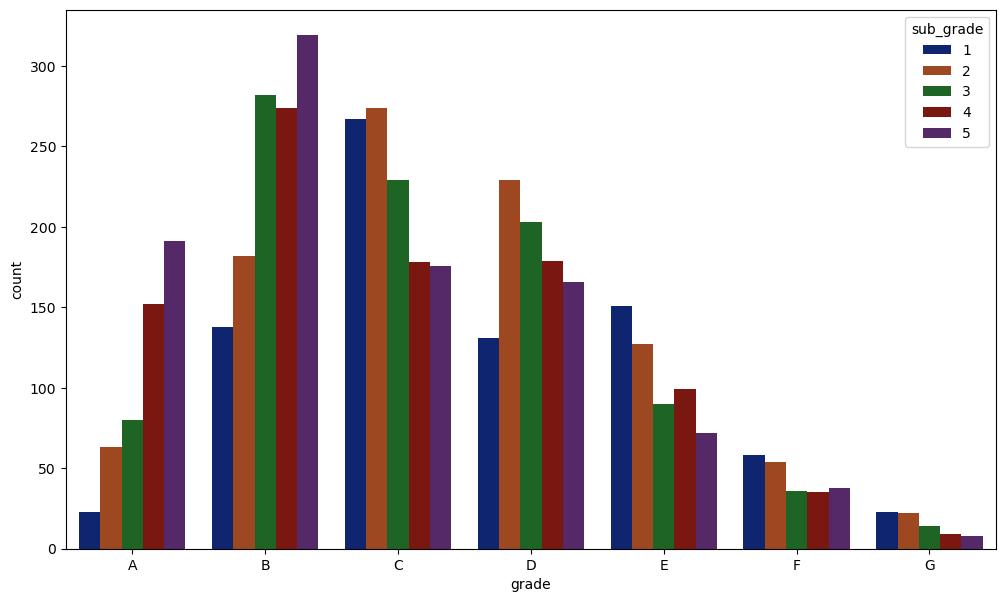

In [55]:

fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('dark')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df1[df1.status == 0])
plt.show()

From the above analysis we can see that B5 has the most number of charge-offs followed by B3 and C2

## 3.12 The 'annual_inc' and 'purpose' columns

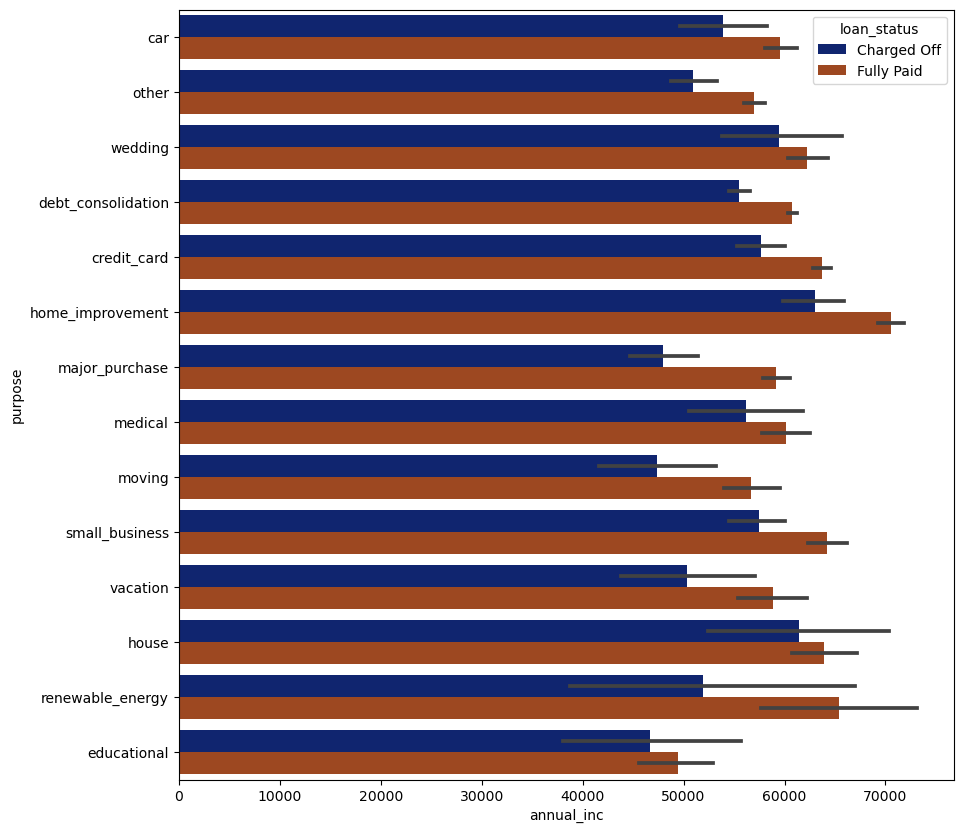

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(data =df1,x='annual_inc', y='purpose', hue ='loan_status',palette="dark")
plt.show()


## 3.13 The 'annual_inc' and 'home_ownership' columns

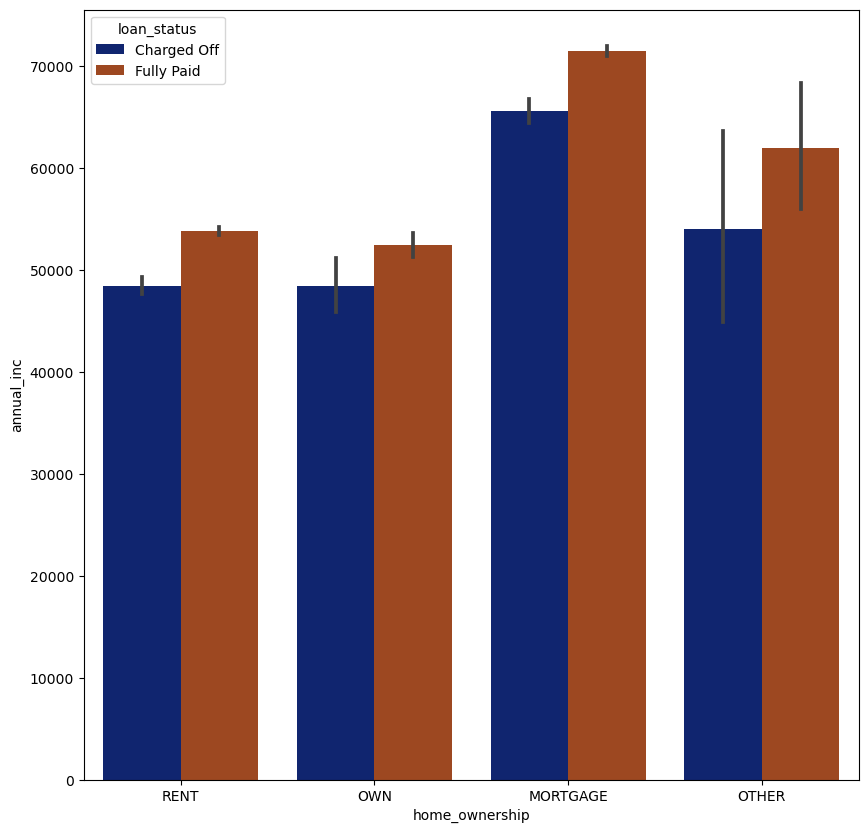

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(data =df1,x='home_ownership', y='annual_inc', hue ='loan_status',palette="dark")
plt.show()

## 3.14 The 'home_ownership' and 'loan_amnt' columns

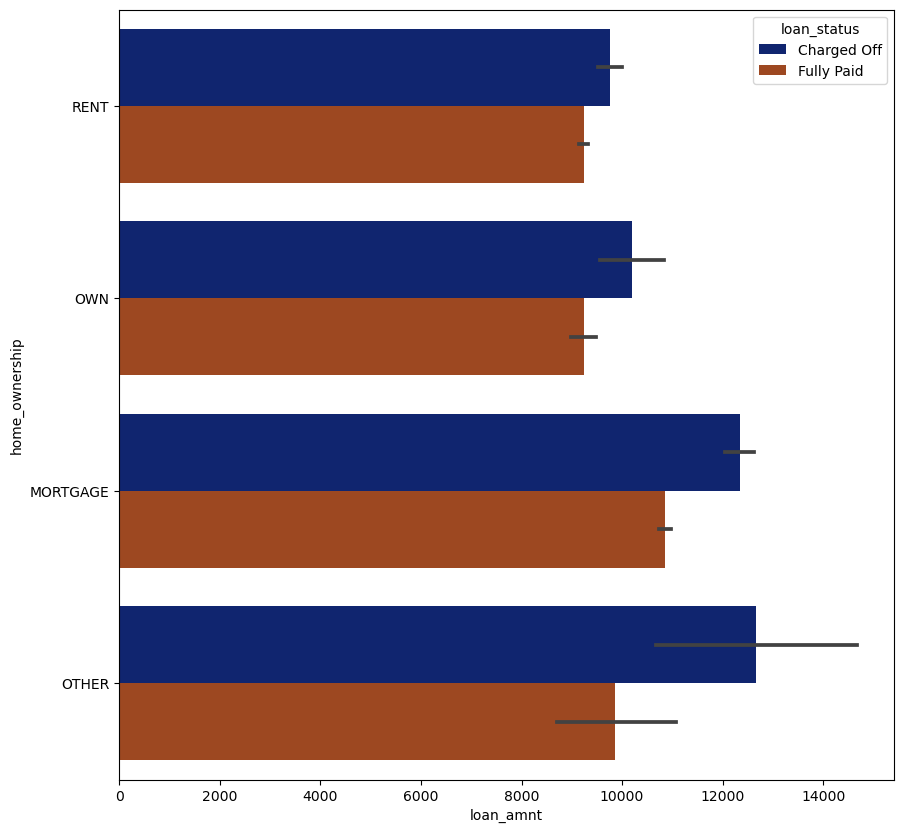

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(data =df1,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="dark")
plt.show()

## 3.15 Heatmaps

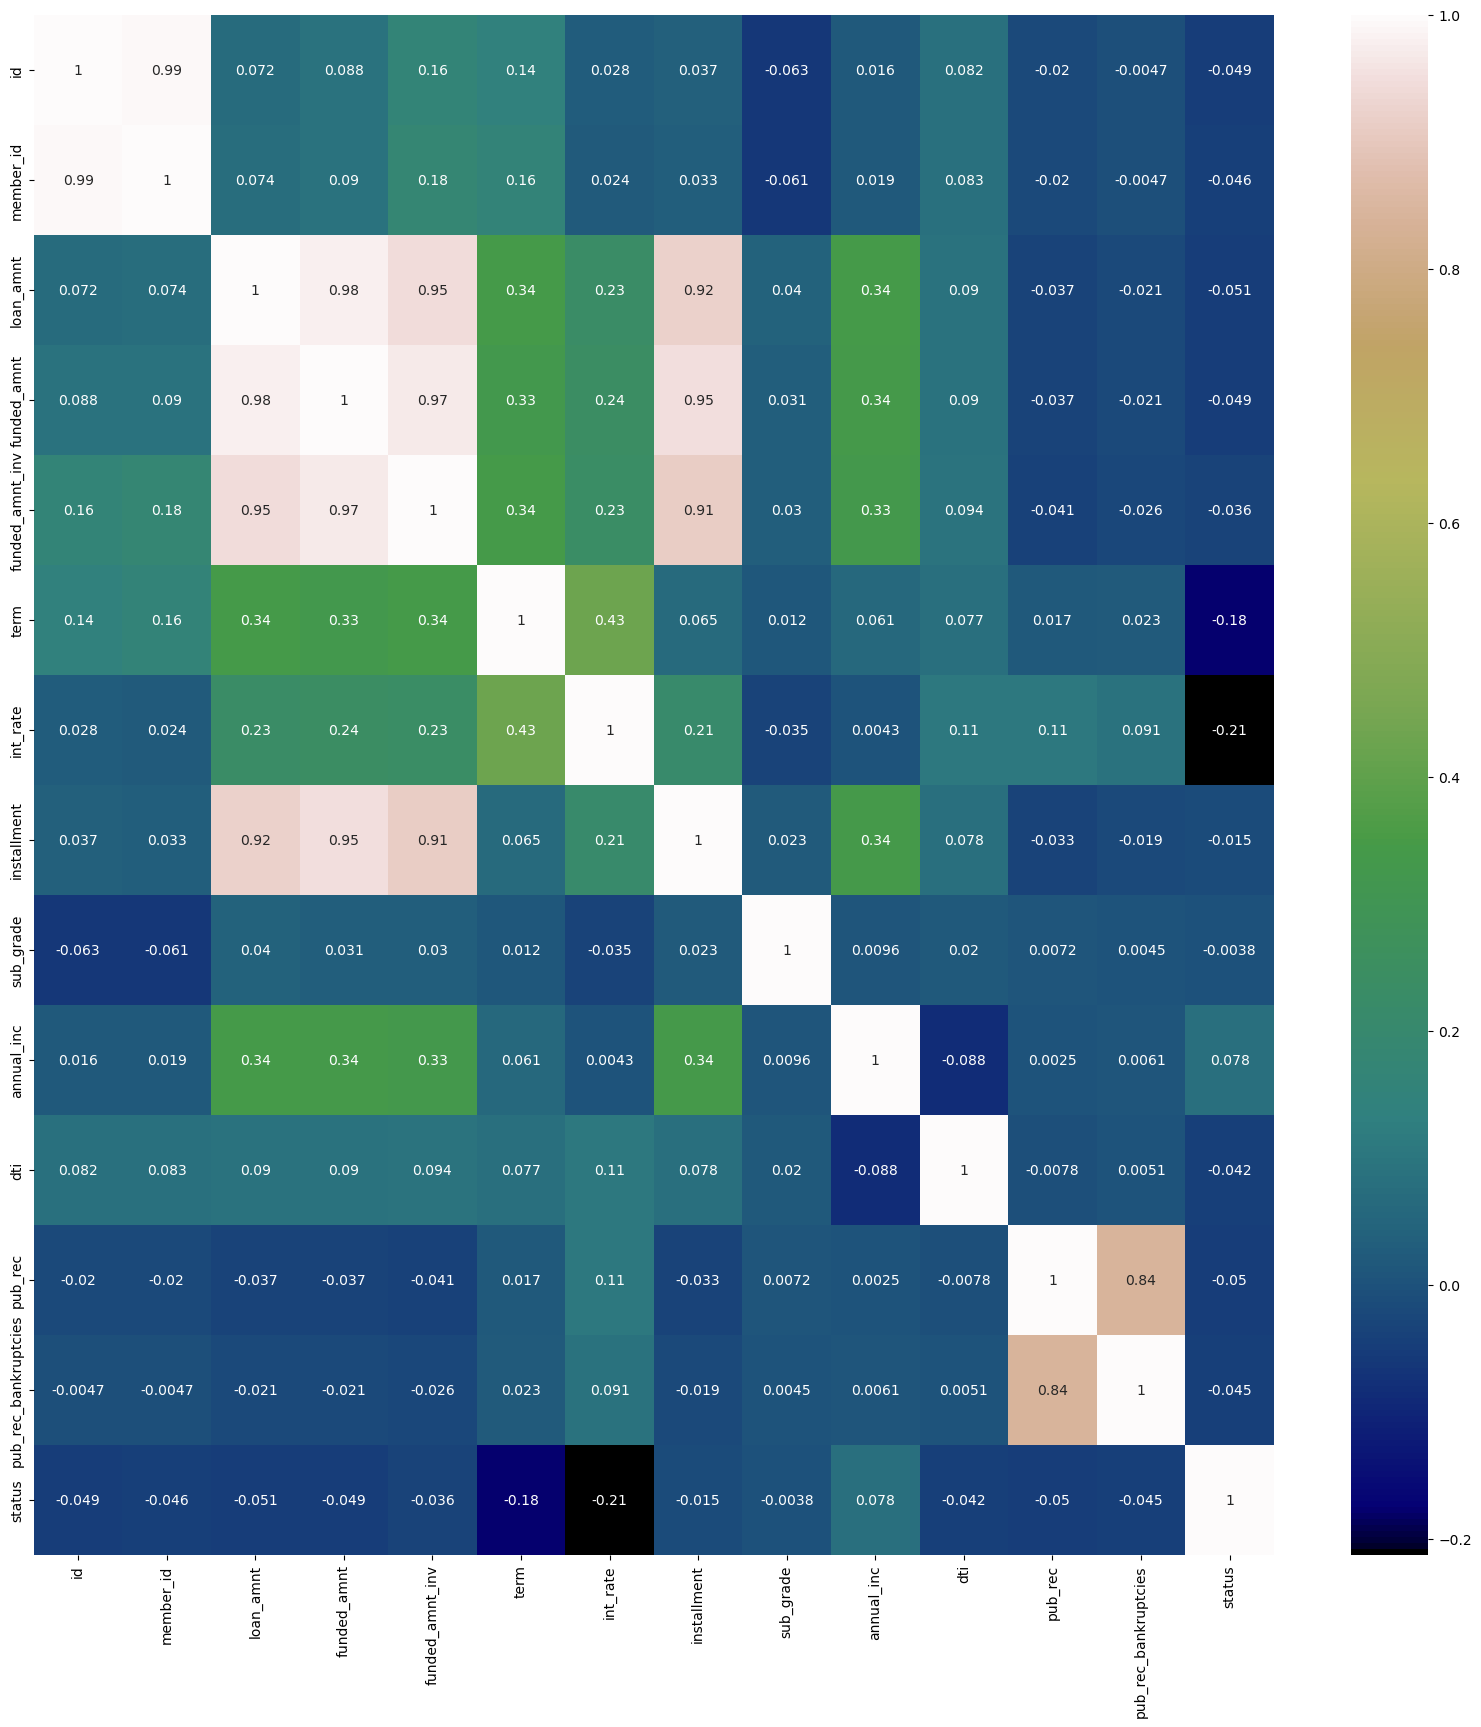

In [59]:
#finding correlation of the dataframe columns with each other.
corr = df1.corr()

# Plot the heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(20,20 ))
sns.heatmap(corr, annot=True, cmap='gist_earth',ax=ax)
plt.show()

<AxesSubplot:xlabel='loan_status-income_Bucket', ylabel='dti_bucket'>

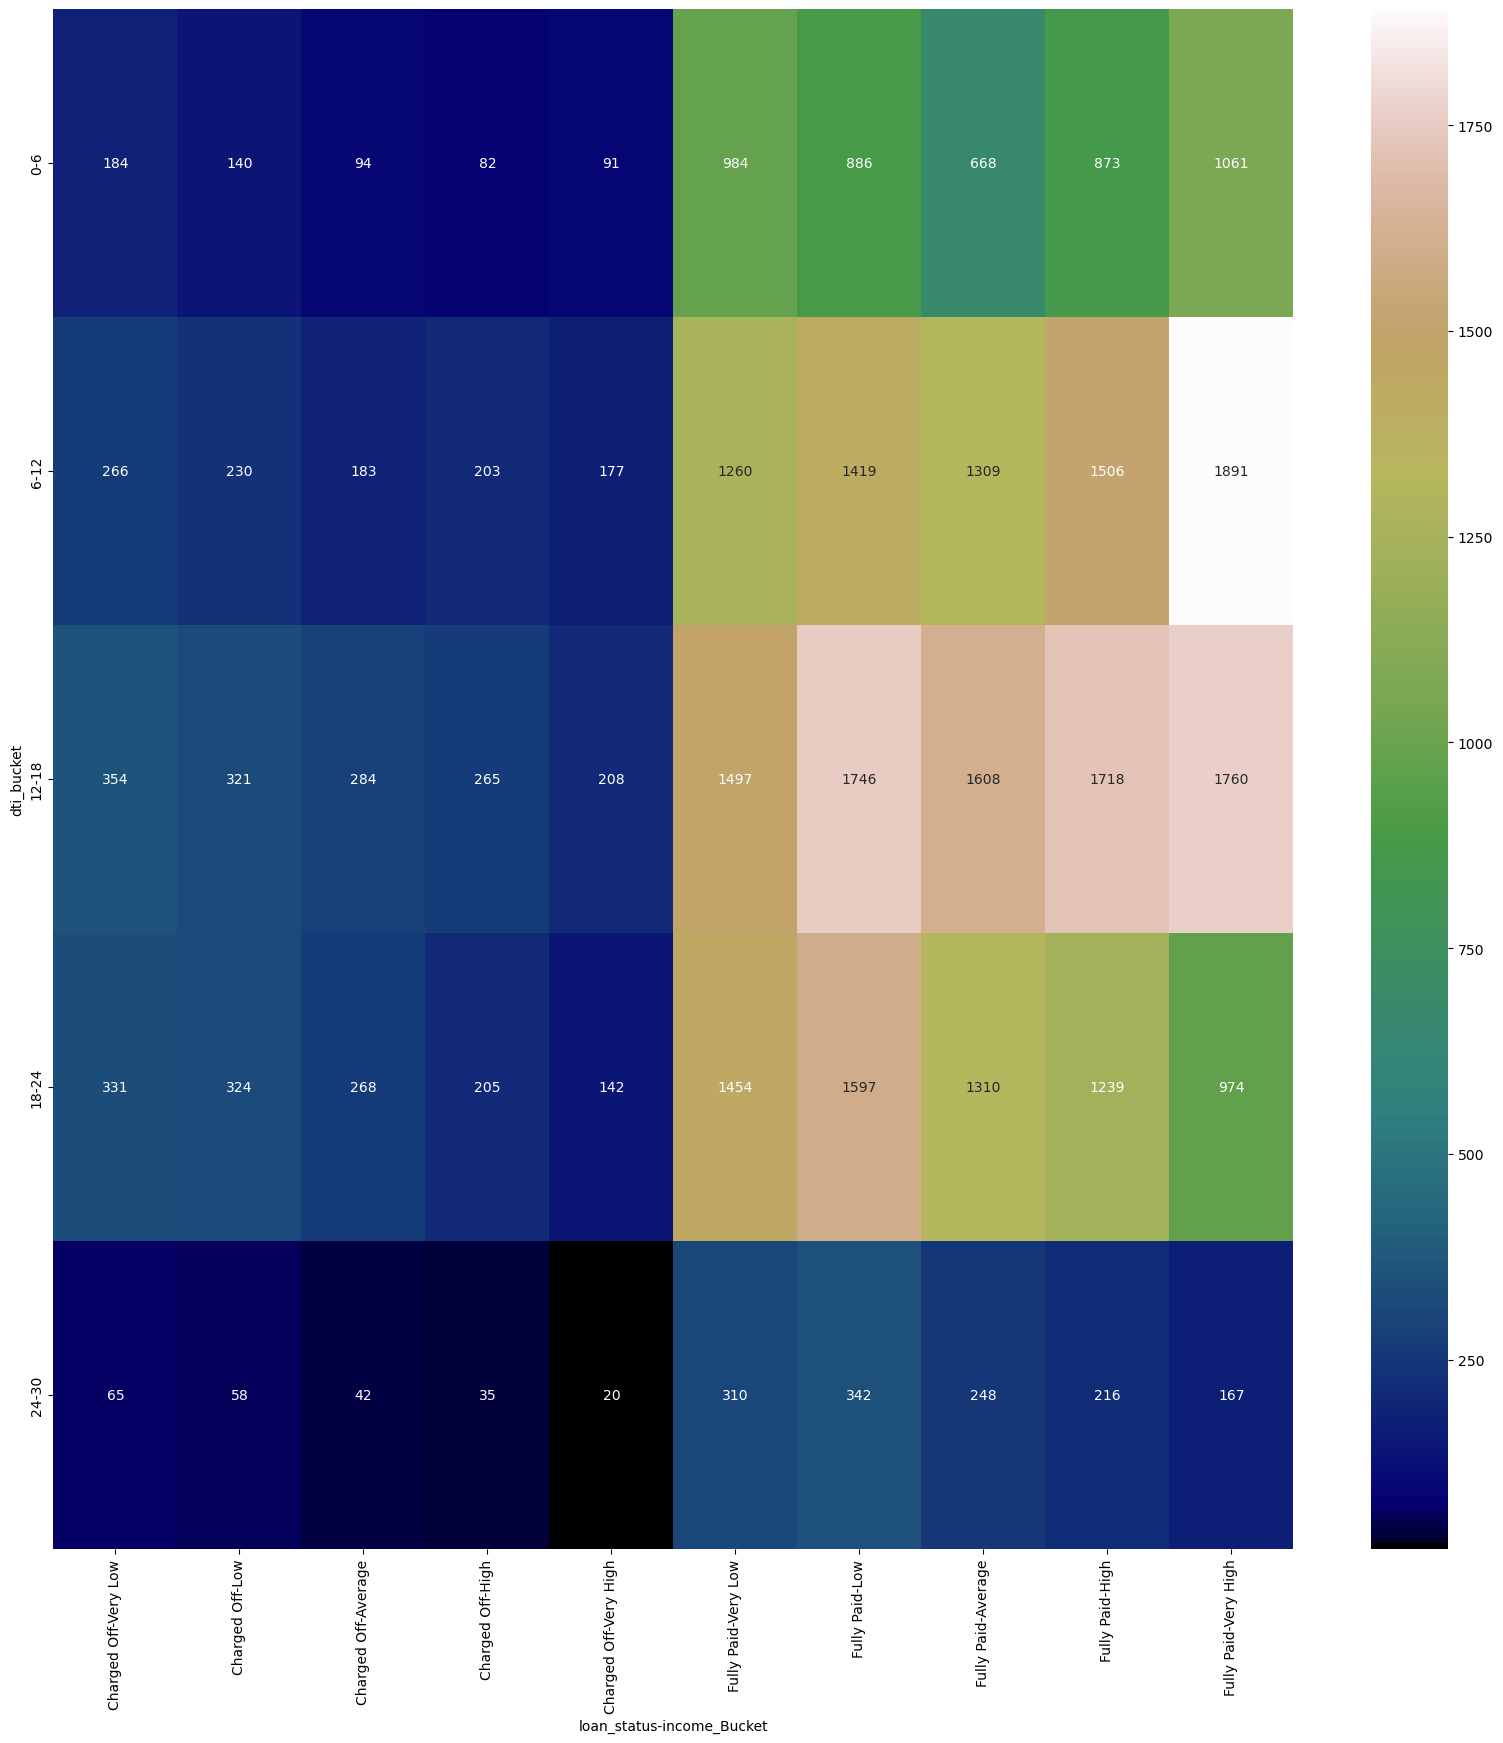

In [60]:
# Group data by columns and count the occurrences
counts = df1.groupby(['income_Bucket', 'dti_bucket','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index='dti_bucket', columns=['loan_status','income_Bucket'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-home_ownership', ylabel='purpose'>

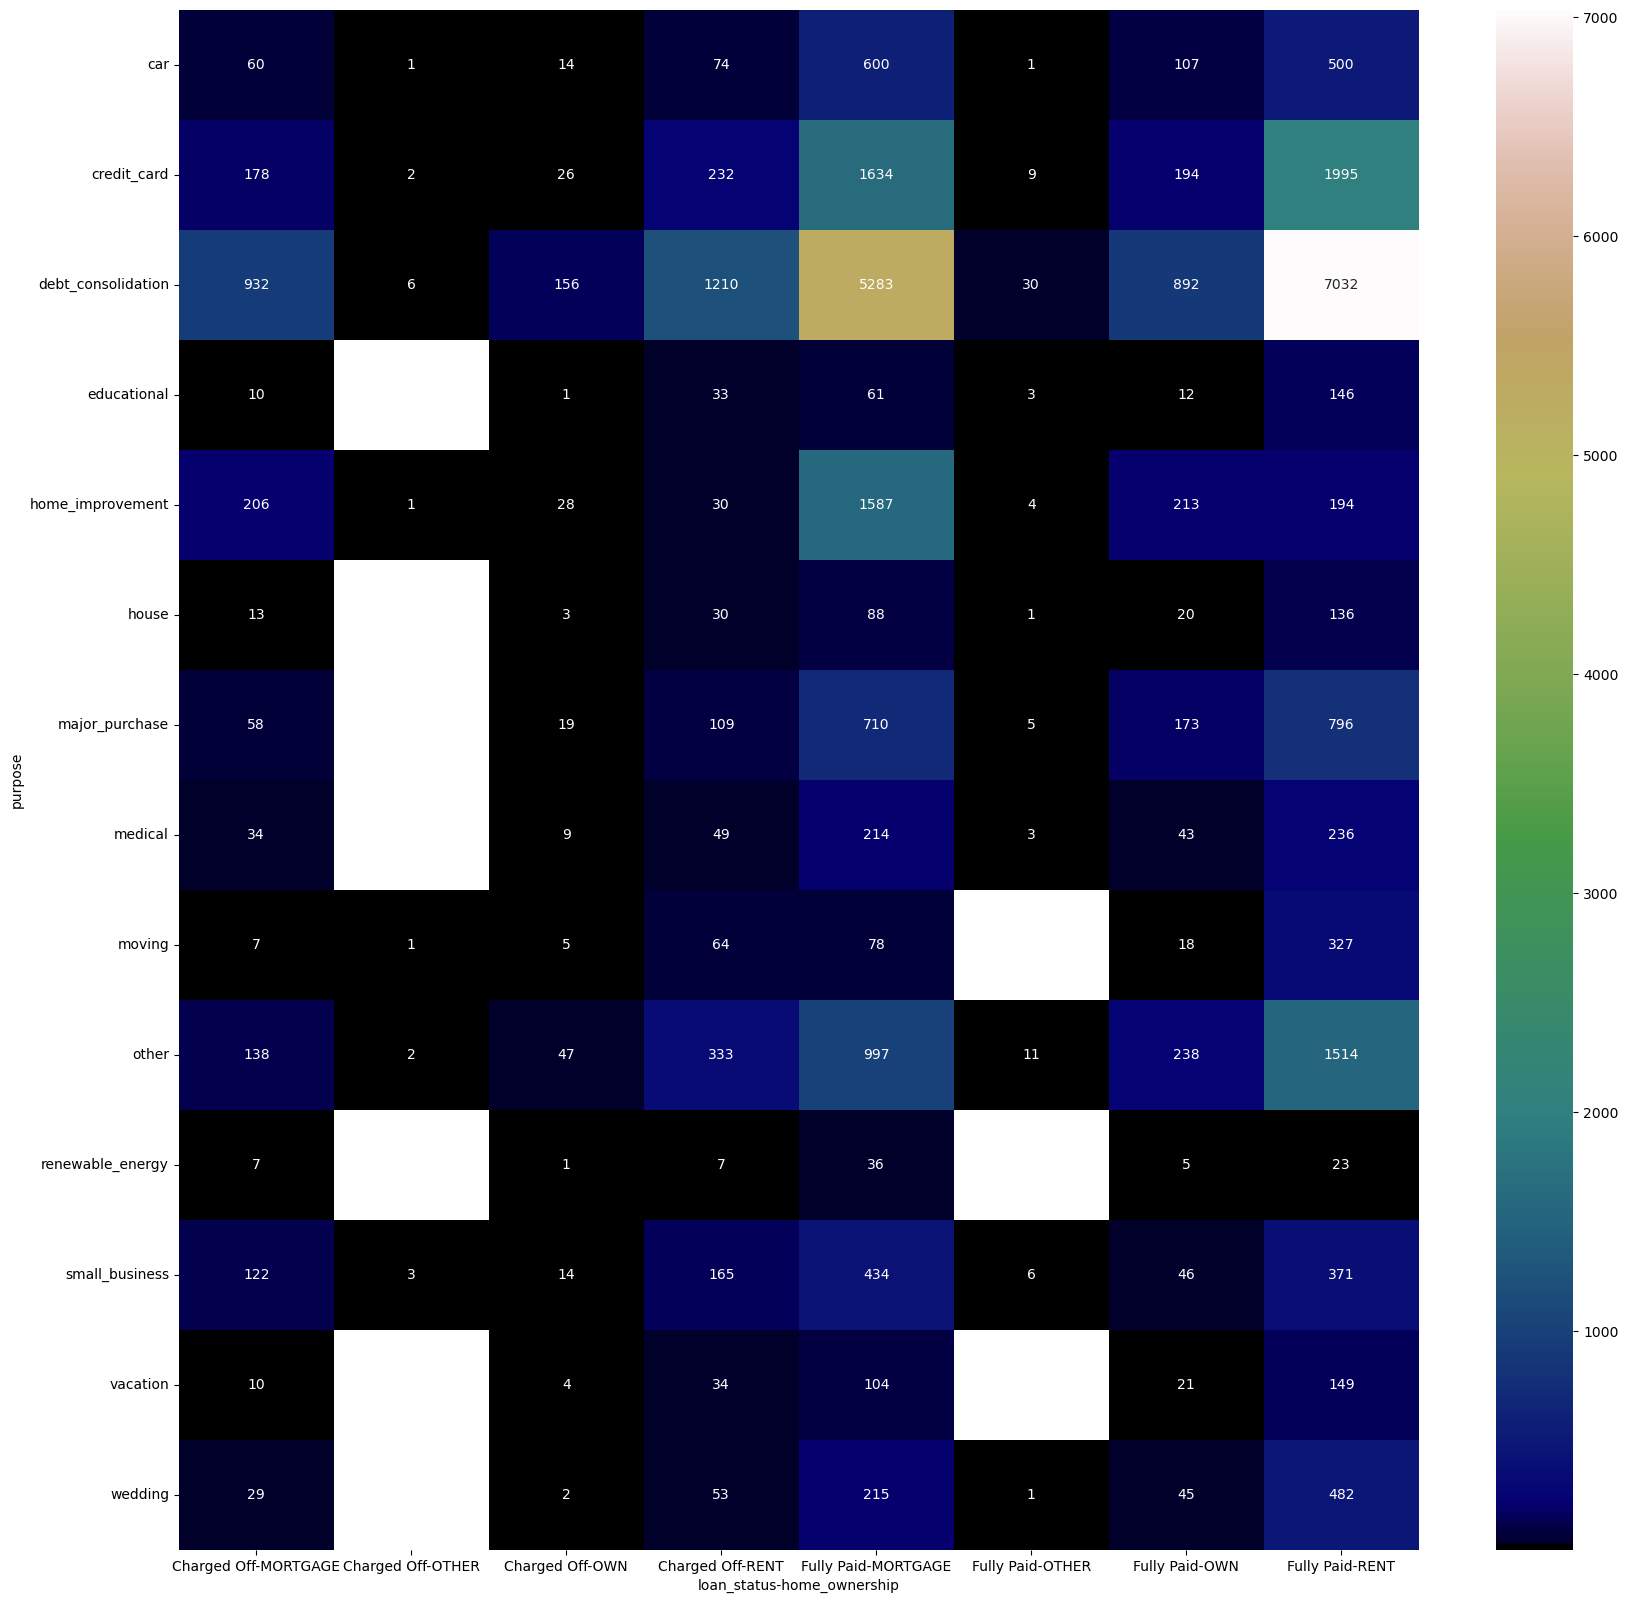

In [61]:
# Group data by columns and count the occurrences
counts = df1.groupby(['purpose', 'home_ownership','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index='purpose', columns=['loan_status','home_ownership'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-home_ownership', ylabel='income_Bucket'>

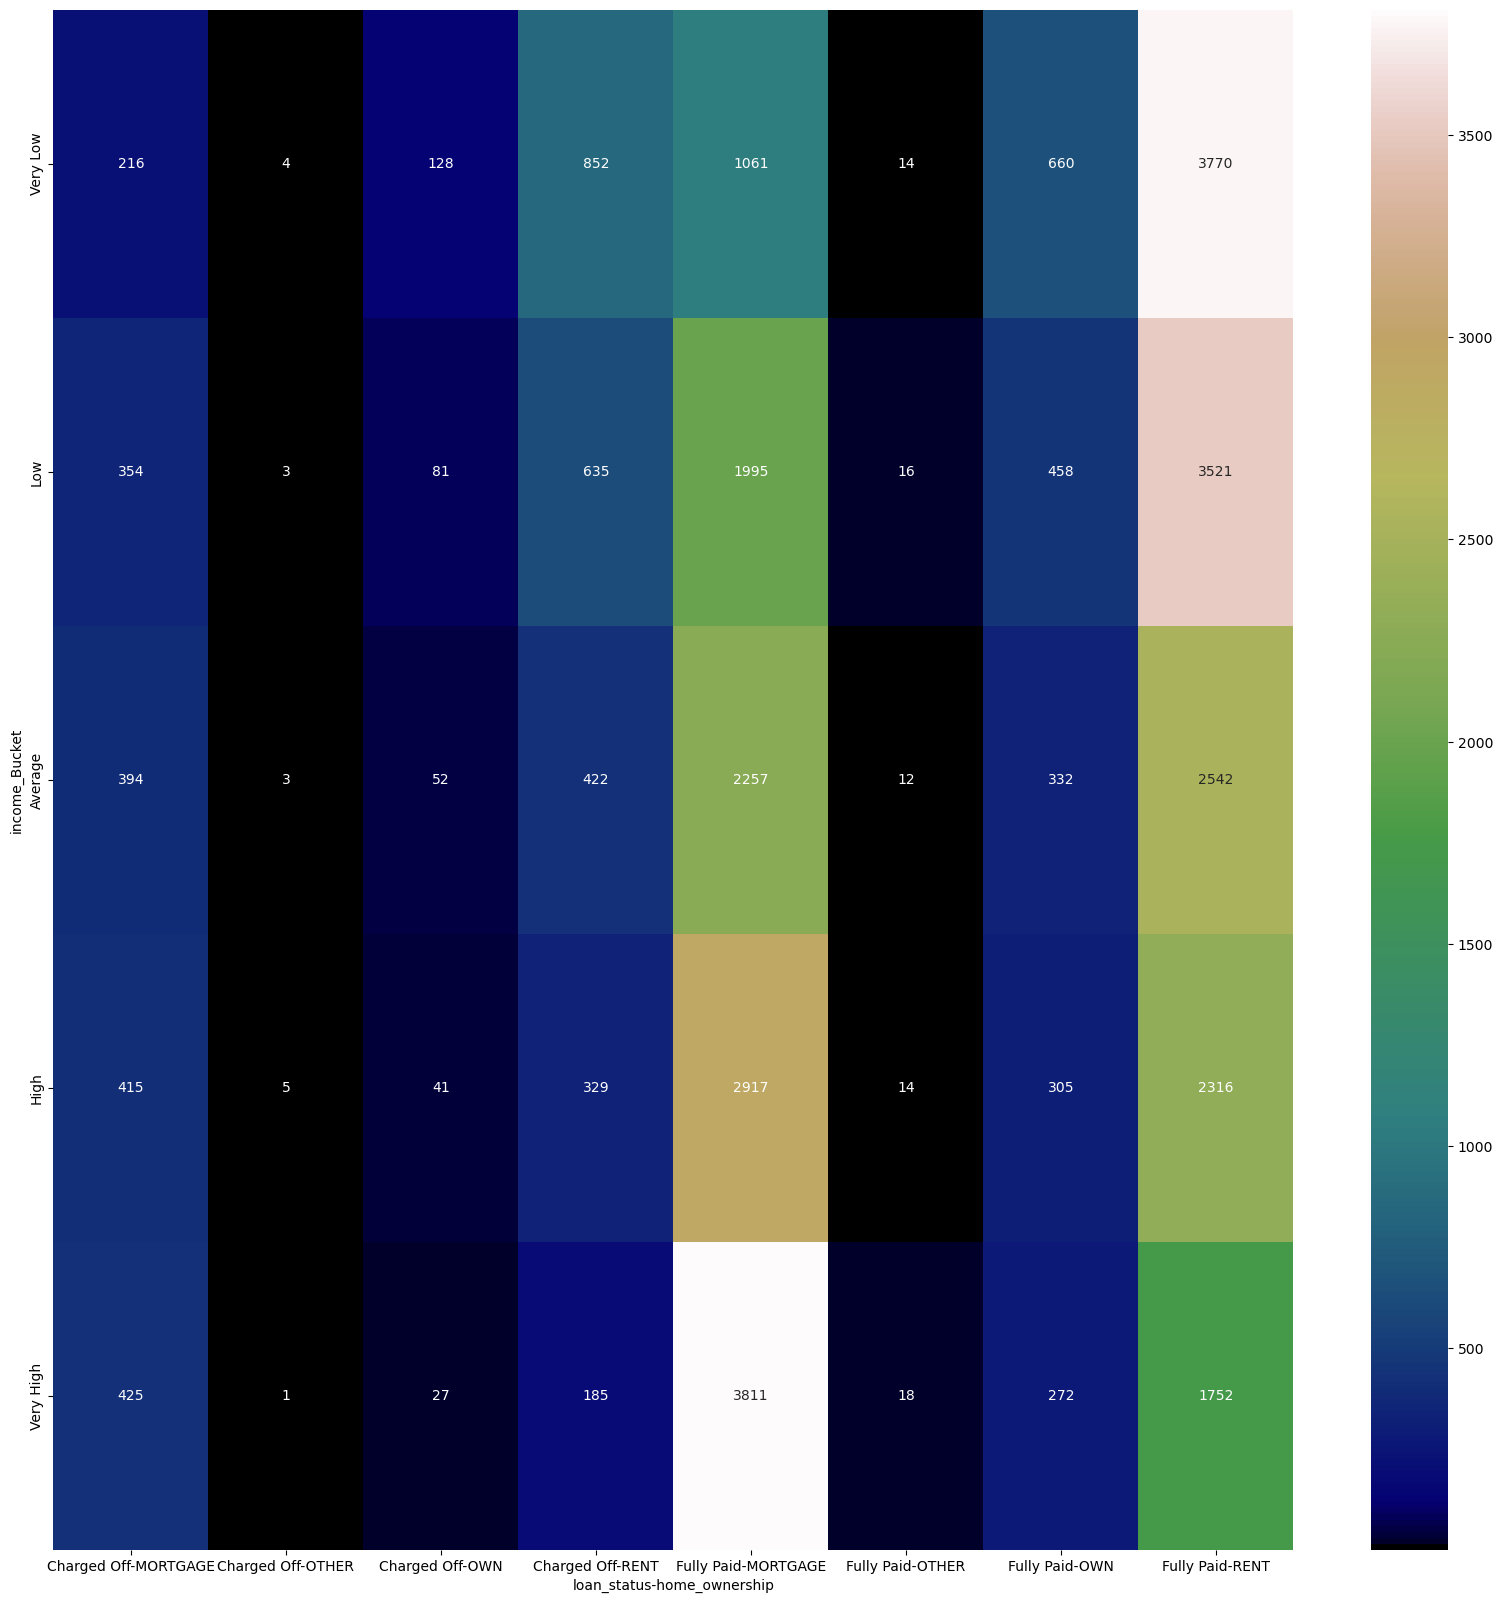

In [62]:
# Group data by columns and count the occurrences
counts = df1.groupby(['income_Bucket', 'home_ownership','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index='income_Bucket', columns=['loan_status','home_ownership'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-home_ownership', ylabel='verification_status'>

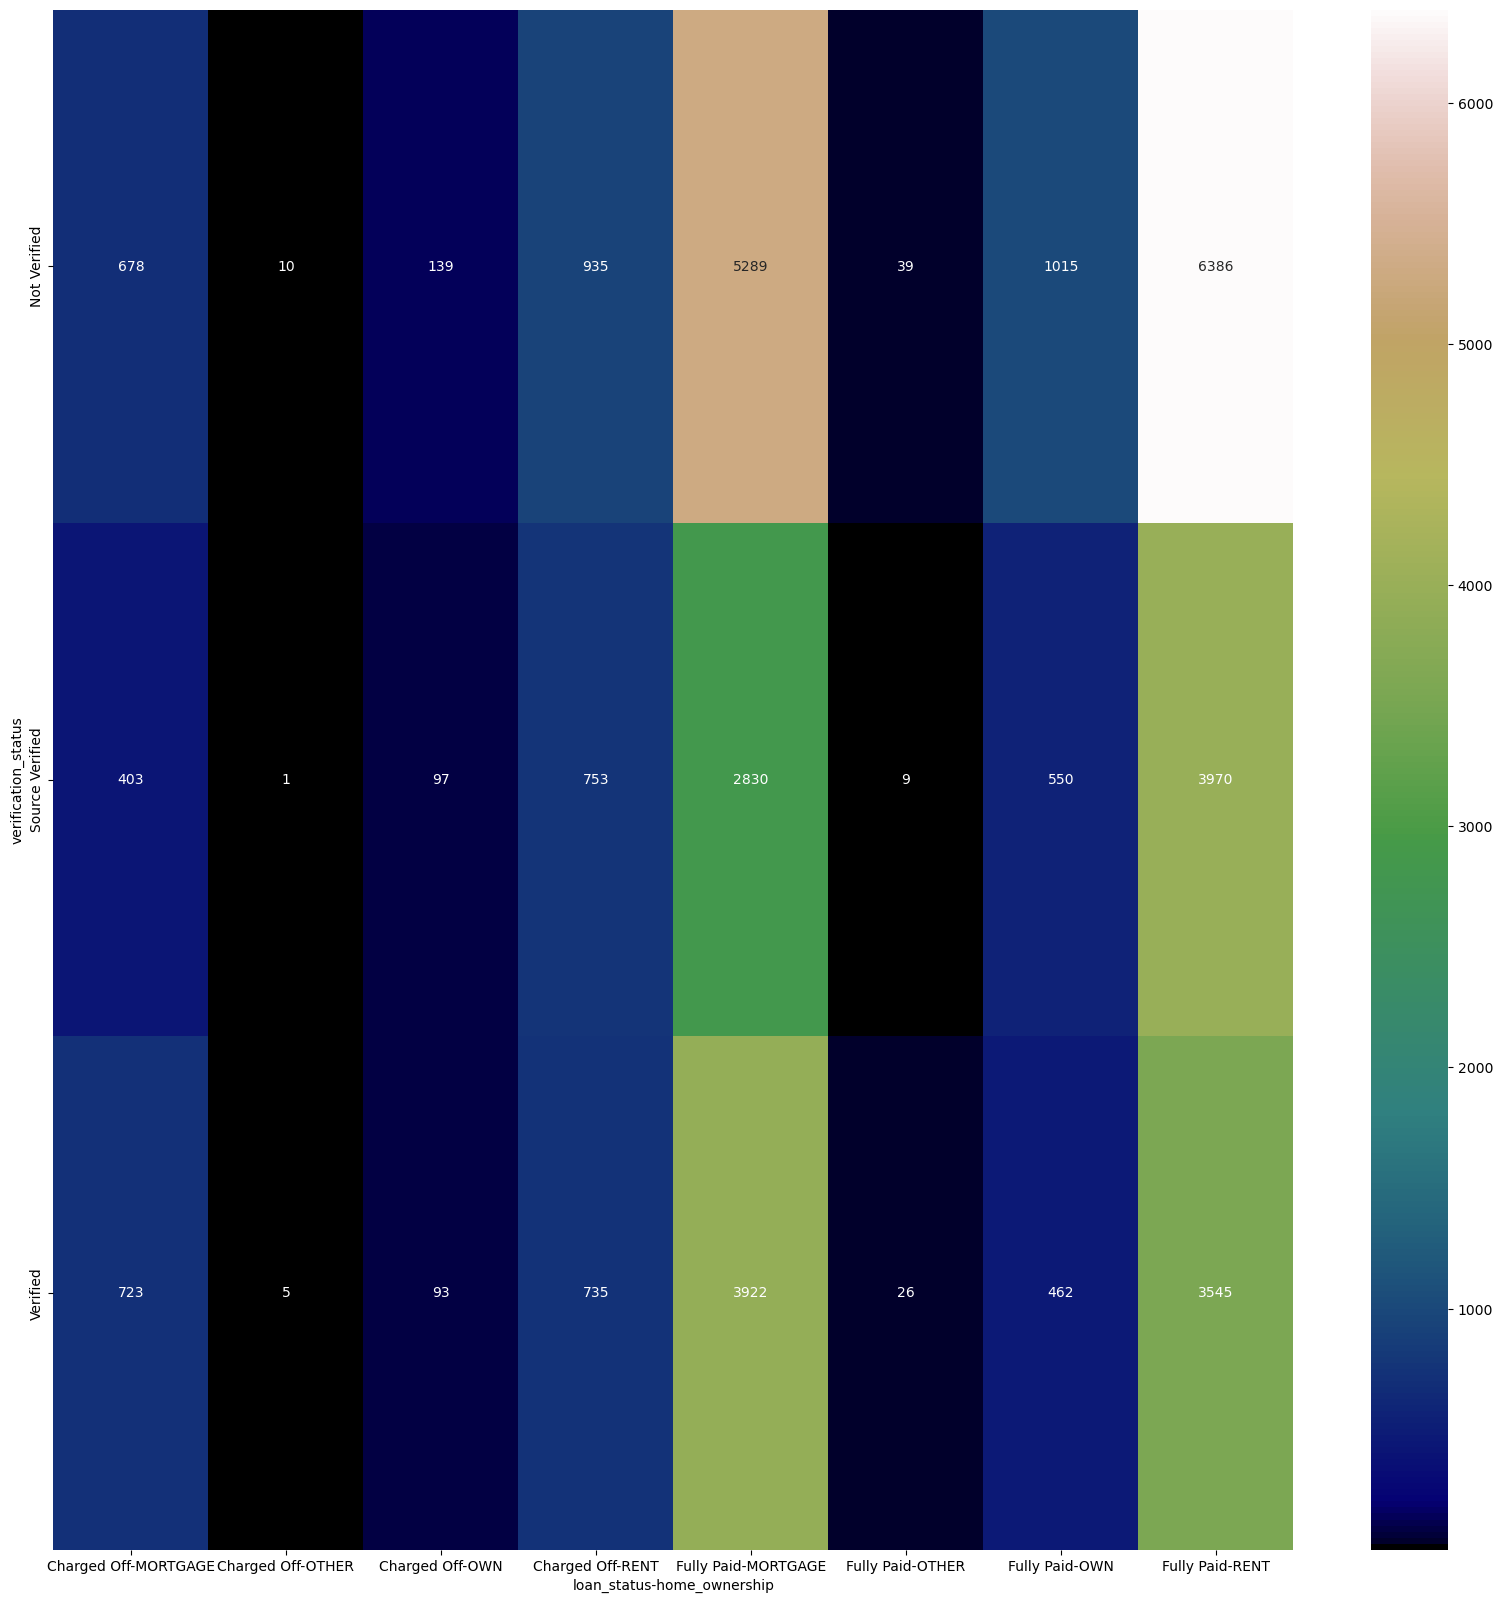

In [63]:
# Group data by columns and count the occurrences
counts = df1.groupby(['verification_status', 'home_ownership','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index='verification_status', columns=['loan_status','home_ownership'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-purpose', ylabel='int_rate_bucket'>

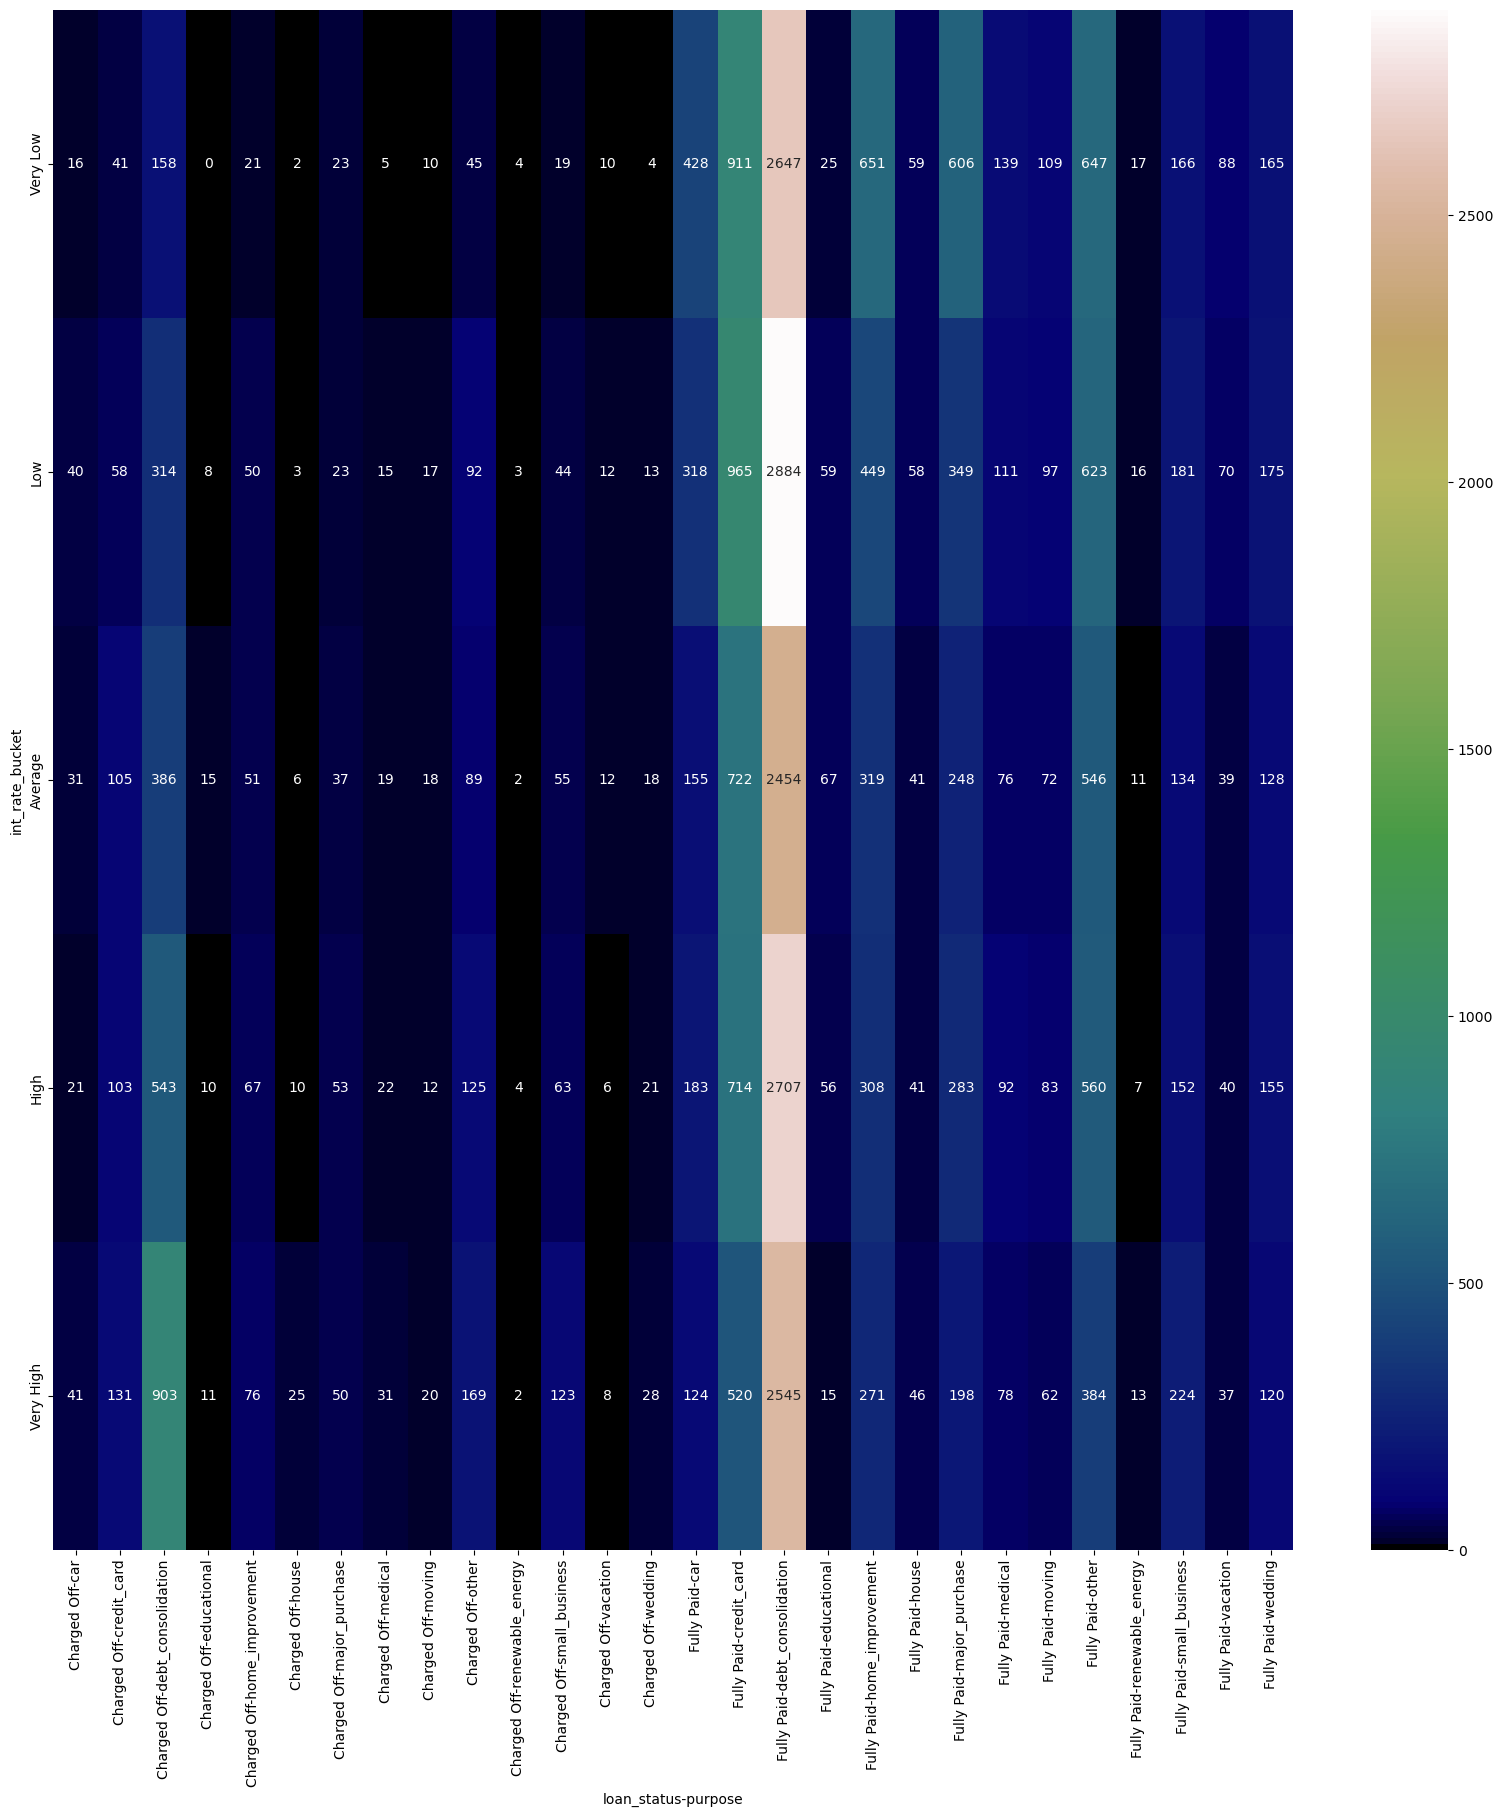

In [64]:
# Group data by columns and count the occurrences
counts = df1.groupby(['int_rate_bucket', 'purpose','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index='int_rate_bucket', columns=['loan_status','purpose'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-installment_bucket', ylabel='int_rate_bucket'>

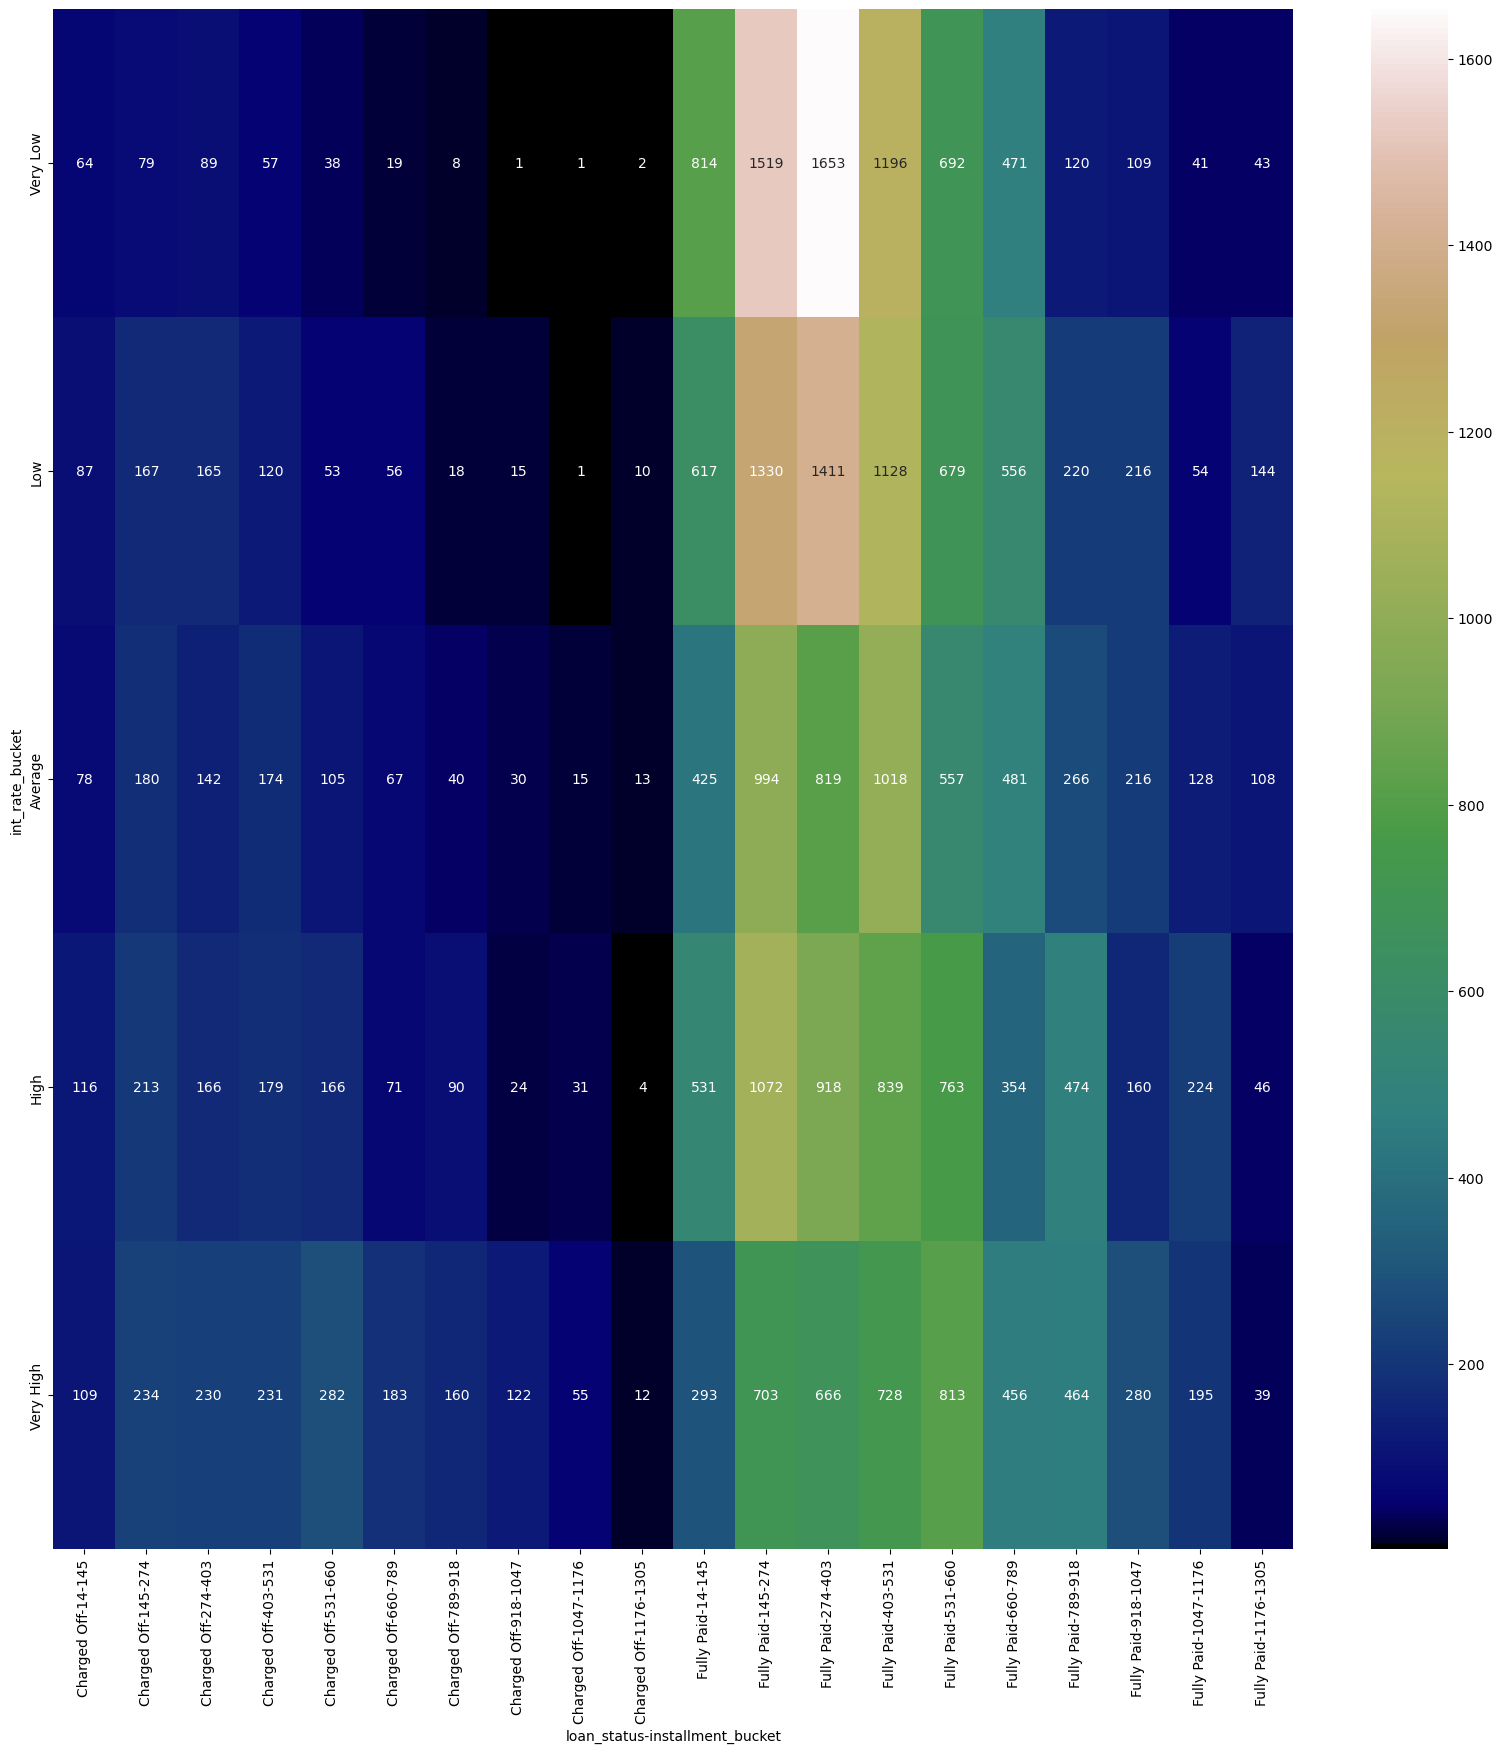

In [65]:
# Group data by columns and count the occurrences
counts = df1.groupby(['int_rate_bucket', 'installment_bucket','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index='int_rate_bucket', columns=['loan_status','installment_bucket'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='income_Bucket-funded_amnt_inv_bucket', ylabel='loan_status-int_rate_bucket'>

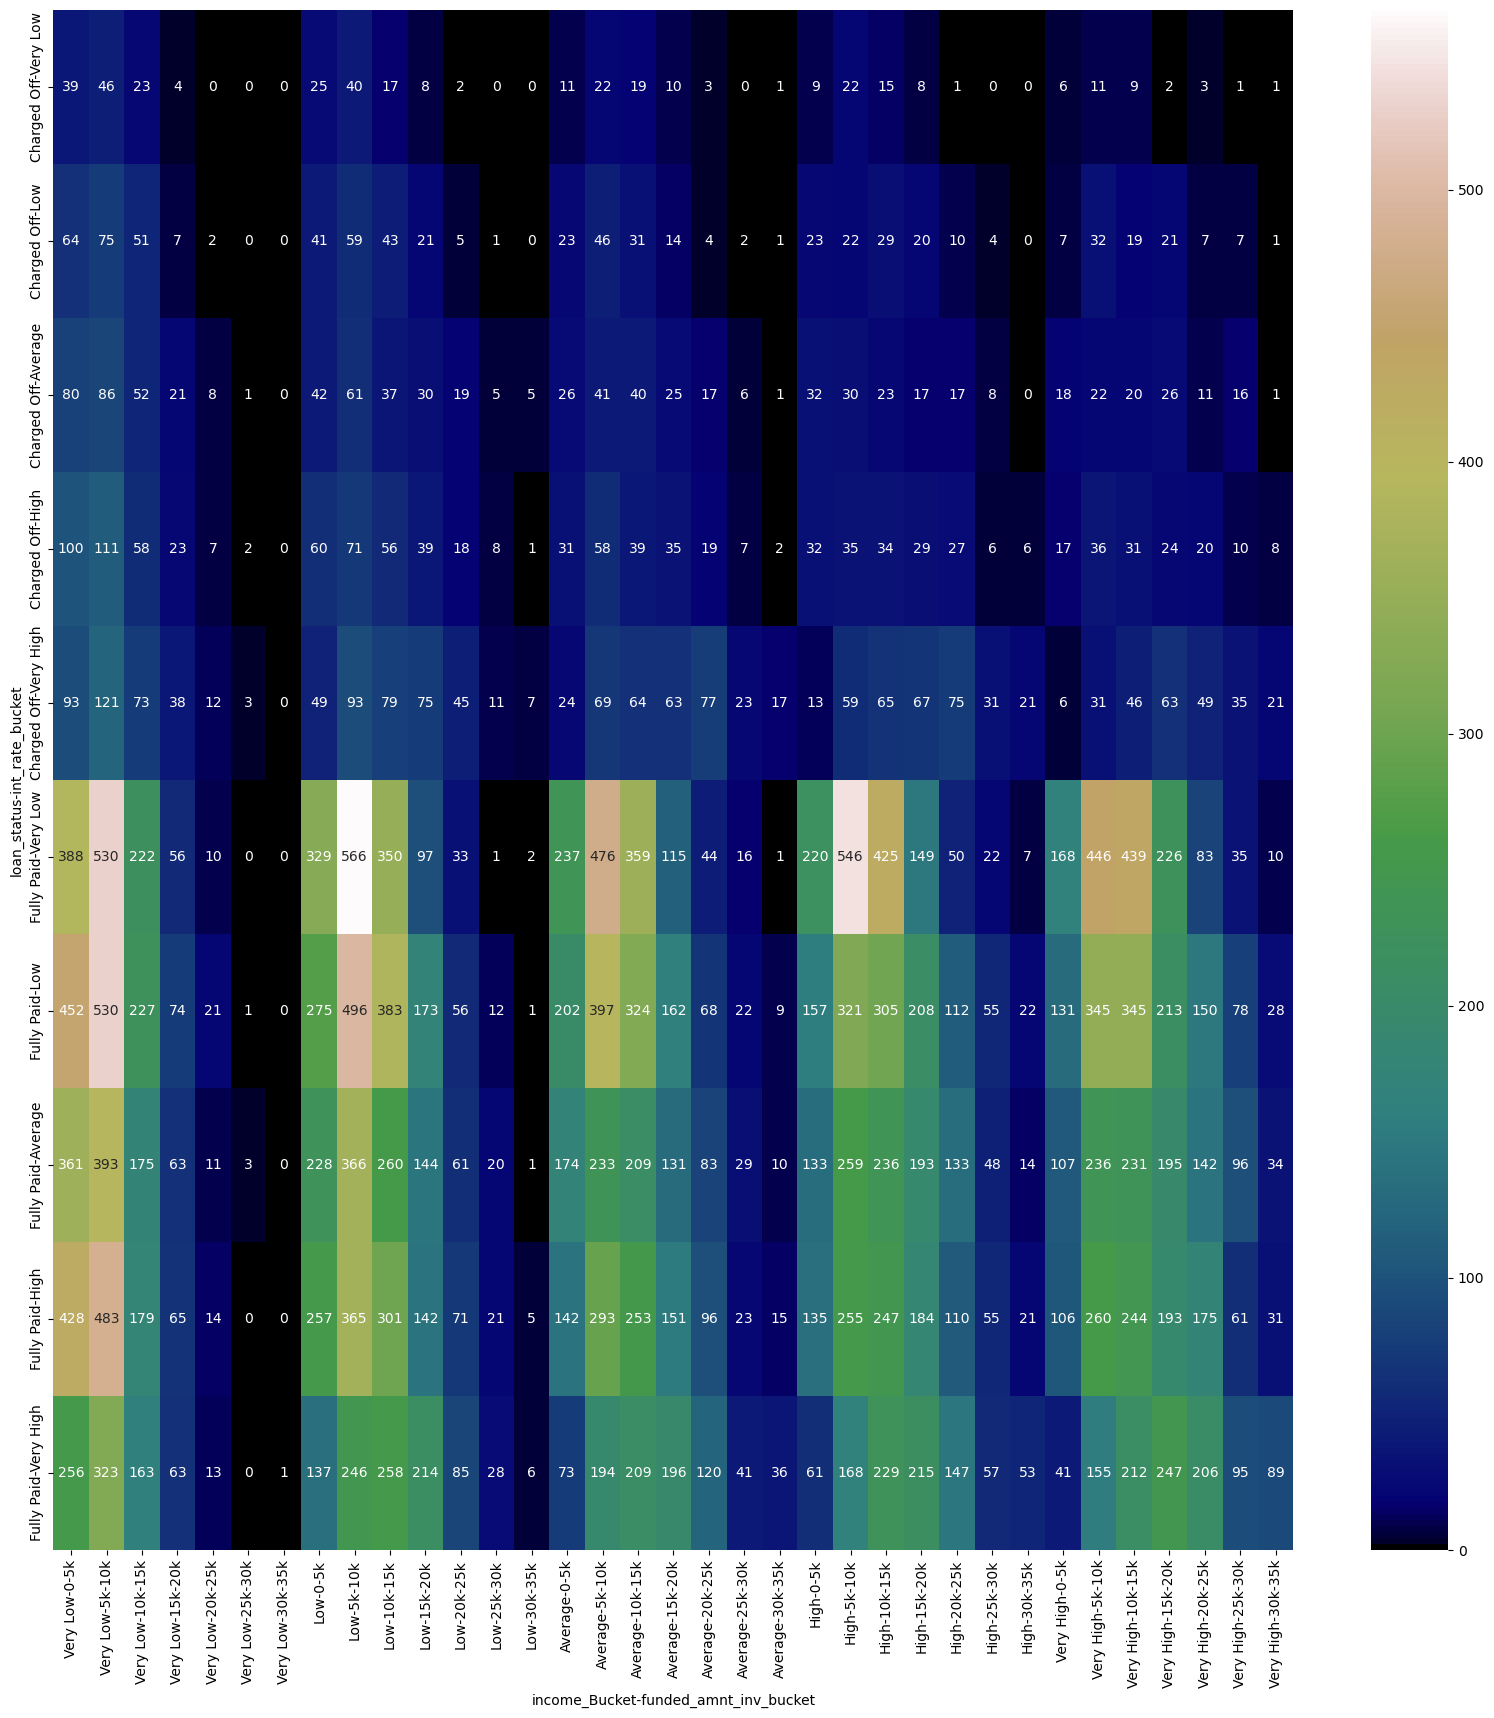

In [66]:
# Group data by columns and count the occurrences
counts = df1.groupby(['int_rate_bucket', 'funded_amnt_inv_bucket','loan_status','income_Bucket']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))

# Plot a heatmap of the counts
sns.heatmap(counts.pivot_table(index=['loan_status','int_rate_bucket'], columns=['income_Bucket','funded_amnt_inv_bucket'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

## 4. Segmented Analysis

Lets perform some analysis on customers that are charged-off only

In [67]:
df2=df1[df1.loan_status=='Charged Off']

In [68]:
df2


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
1      1077430    1314167       2500         2500      2500.000000    60   
9      1071570    1306721       5375         5375      5350.000000    60   
12     1064687    1298717       9000         9000      9000.000000    36   
14     1069057    1303503      10000        10000     10000.000000    36   
21     1039153    1269083      21000        21000     21000.000000    36   
...        ...        ...        ...          ...              ...   ...   
39251   246276     246273      10100        10100      6425.004533    36   
39291   239690     239649      15450        15450      5650.000000    36   
39362   218343     218321       2150         2150      1574.996529    36   
39425   202270     202156       4000         4000      1199.992159    36   
39623   132892     132889       9000         9000       700.000000    36   

       int_rate  installment grade  sub_grade  ... pub_rec_bankruptcies  \
1         15.27        59.83     C          4  ...                  0.0   
9         12.69       121.45     B          5  ...                  0.0   
12        13.49       305.38     C          1  ...                  0.0   
14        10.65       325.74     B          2  ...                  0.0   
21        12.42       701.73     B          4  ...                  0.0   
...         ...          ...   ...        ...  ...                  ...   
39251     13.55       343.00     D          4  ...                  1.0   
39291     13.93       527.52     E          1  ...                  1.0   
39362     10.78        70.17     C          1  ...                  1.0   
39425     12.36       133.55     D          1  ...                  1.0   
39623     12.49       301.04     D          3  ...                  1.0   

      installment_bucket funded_amnt_inv_bucket  loan_amnt_bucket dti_bucket  \
1                 14-145                   0-5k              0-5k        0-6   
9                145-274                 5k-10k            5k-10k      18-24   
12               403-531                10k-15k           10k-15k       6-12   
14               403-531                10k-15k           10k-15k       6-12   
21             1047-1176                25k-30k           25k-30k      12-18   
...                  ...                    ...               ...        ...   
39251            531-660                 5k-10k           10k-15k      12-18   
39291            789-918                 5k-10k           15k-20k      18-24   
39362             14-145                   0-5k              0-5k      18-24   
39425            145-274                   0-5k              0-5k       6-12   
39623            403-531                   0-5k           10k-15k        0-6   

      income_Bucket int_rate_bucket month  year status  
1          Very Low       Very High   Dec  2011      0  
9          Very Low         Average   Dec  2011      0  
12         Very Low            High   Dec  2011      0  
14        Very High             Low   Dec  2011      0  
21        Very High         Average   Dec  2011      0  
...             ...             ...   ...   ...    ...  
39251      Very Low            High   Feb  2008      0  
39291           Low            High   Feb  2008      0  
39362      Very Low             Low   Jan  2008      0  
39425           Low         Average   Jan  2008      0  
39623           Low         Average   Oct  2007      0  

[4572 rows x 33 columns]

<AxesSubplot:xlabel='income_Bucket-funded_amnt_inv_bucket', ylabel='loan_status-int_rate_bucket'>

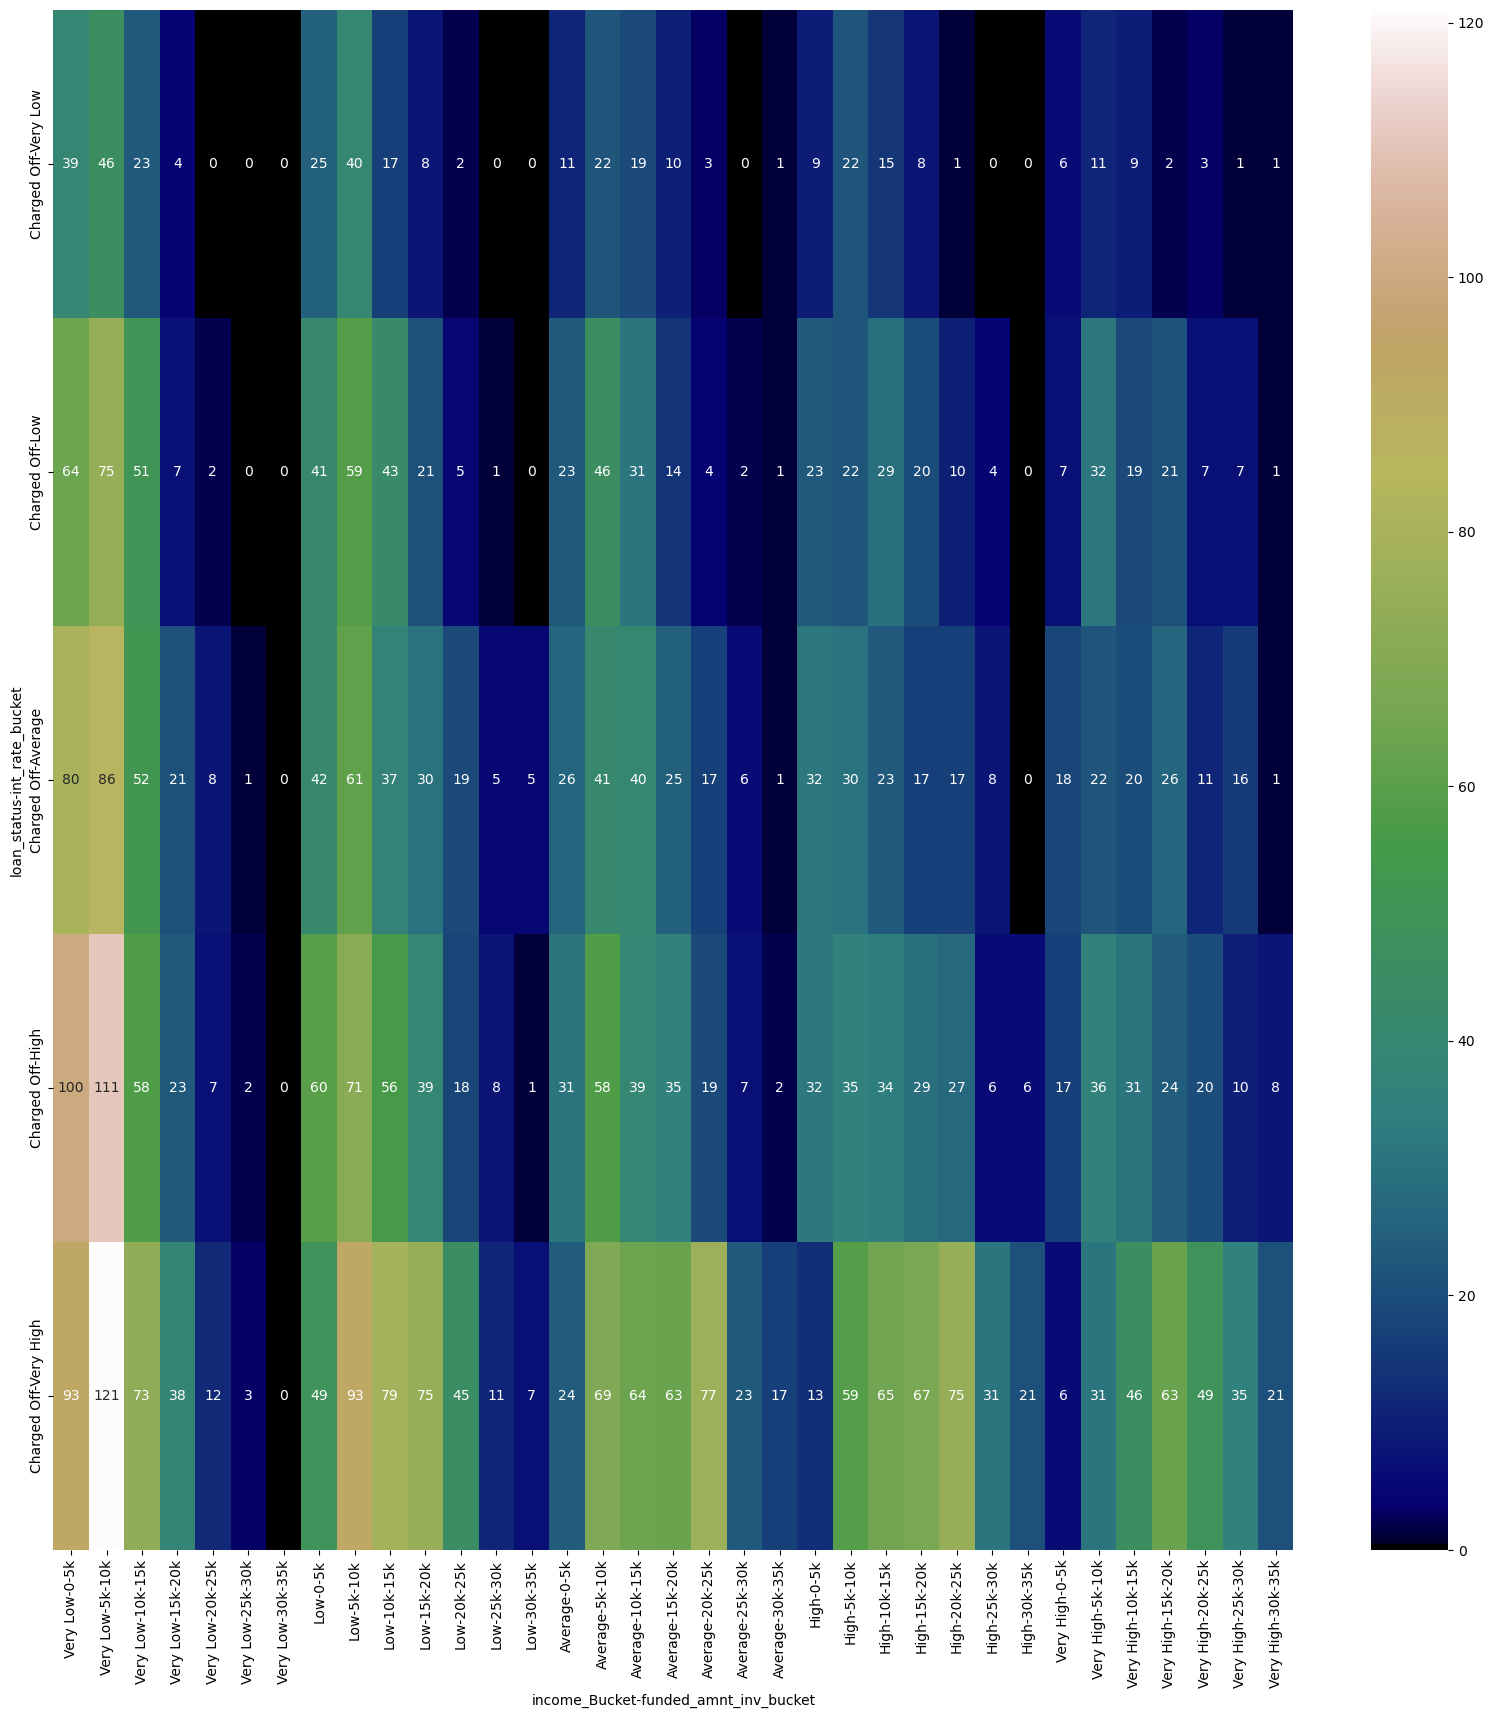

In [69]:
counts = df2.groupby(['int_rate_bucket', 'funded_amnt_inv_bucket','loan_status','income_Bucket']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))


sns.heatmap(counts.pivot_table(index=['loan_status','int_rate_bucket'], columns=['income_Bucket','funded_amnt_inv_bucket'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-installment_bucket', ylabel='int_rate_bucket'>

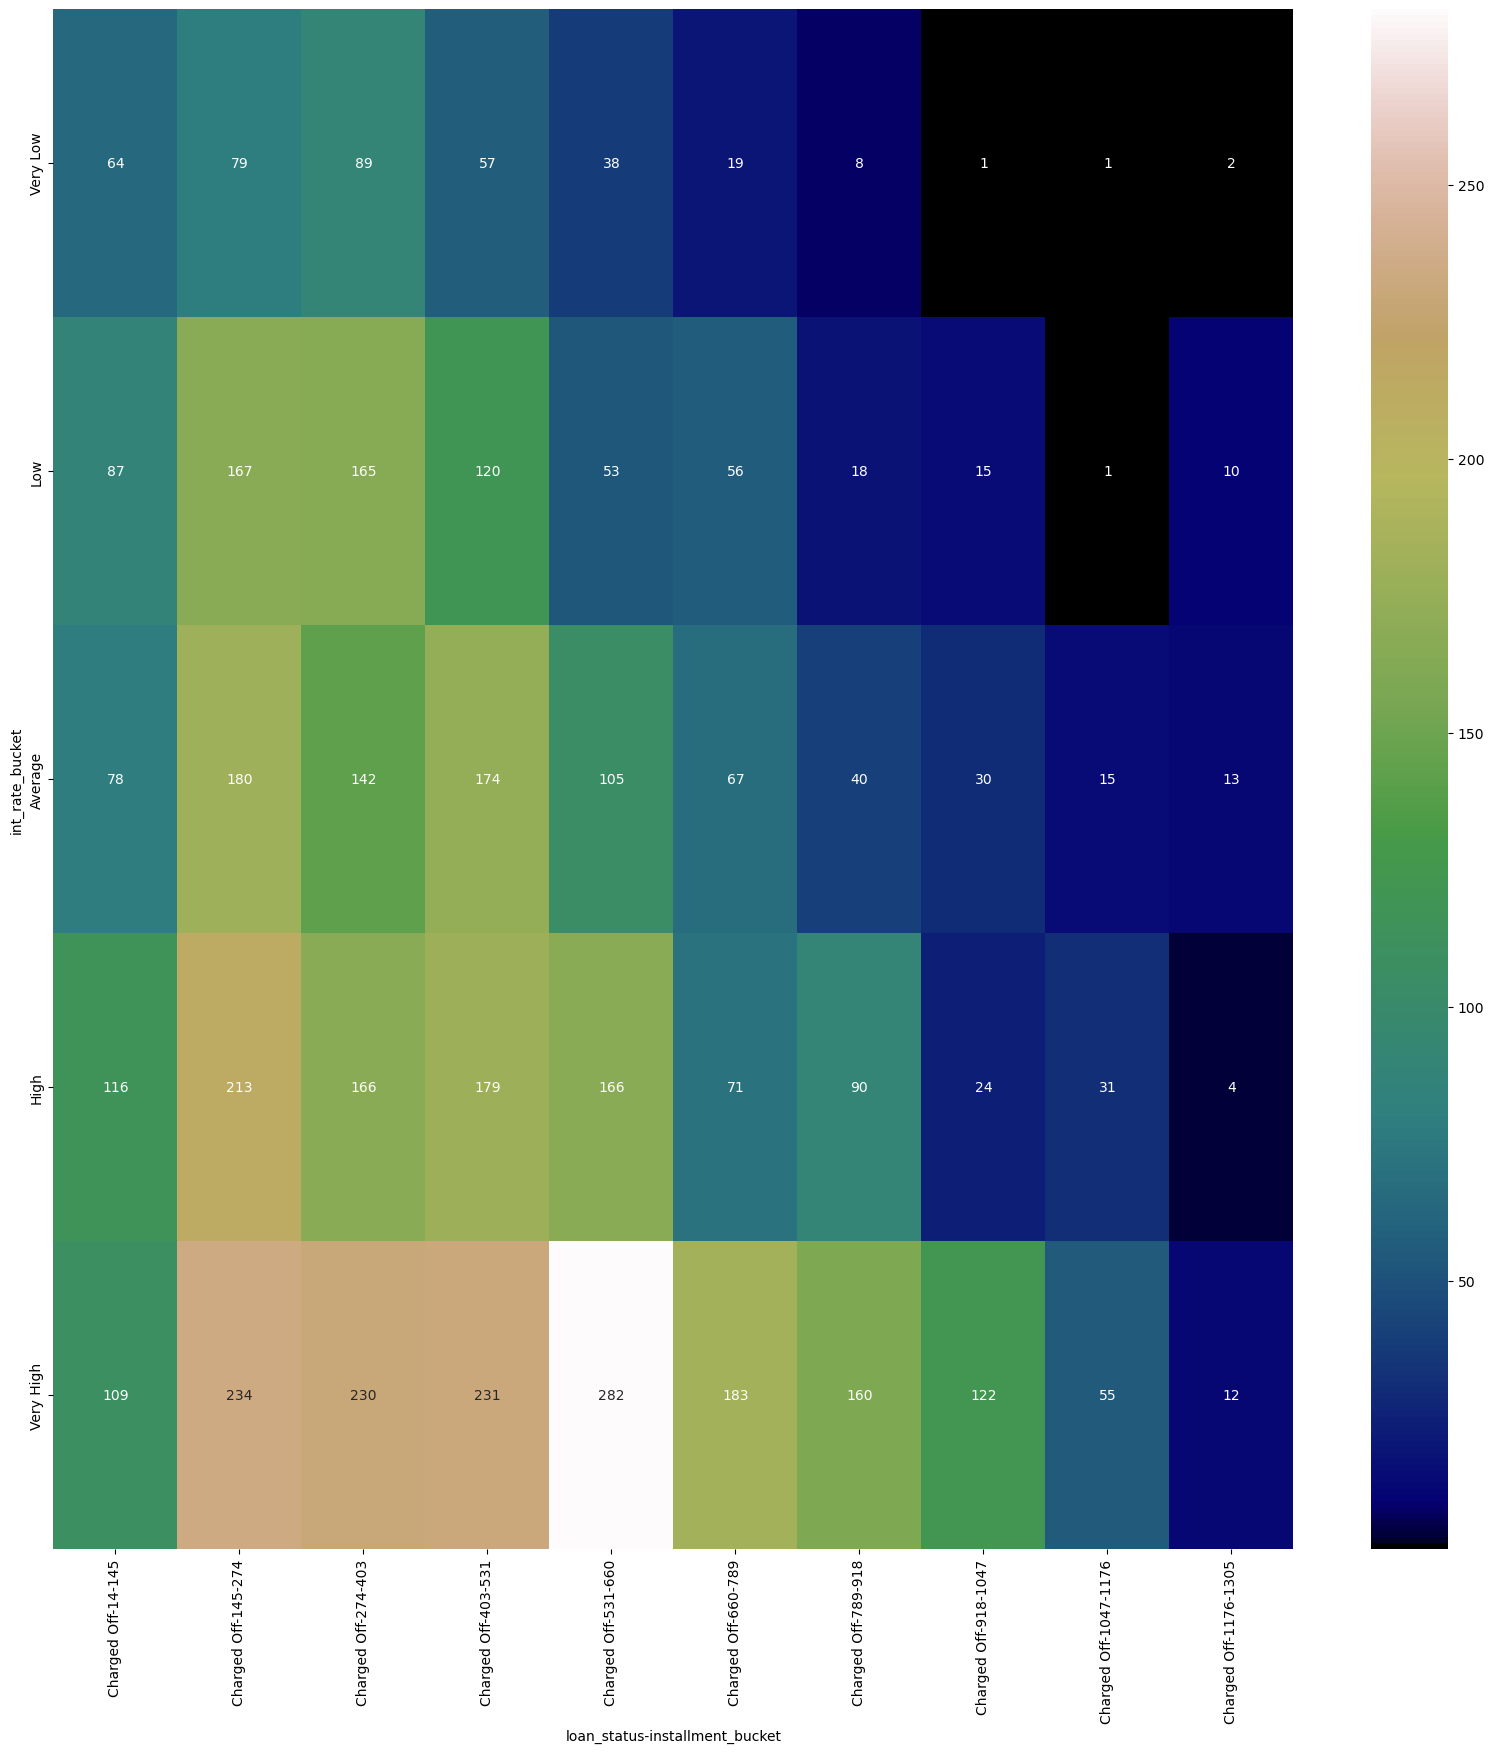

In [70]:
counts = df2.groupby(['int_rate_bucket', 'installment_bucket','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
sns.heatmap(counts.pivot_table(index='int_rate_bucket', columns=['loan_status','installment_bucket'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

<AxesSubplot:xlabel='loan_status-home_ownership', ylabel='verification_status'>

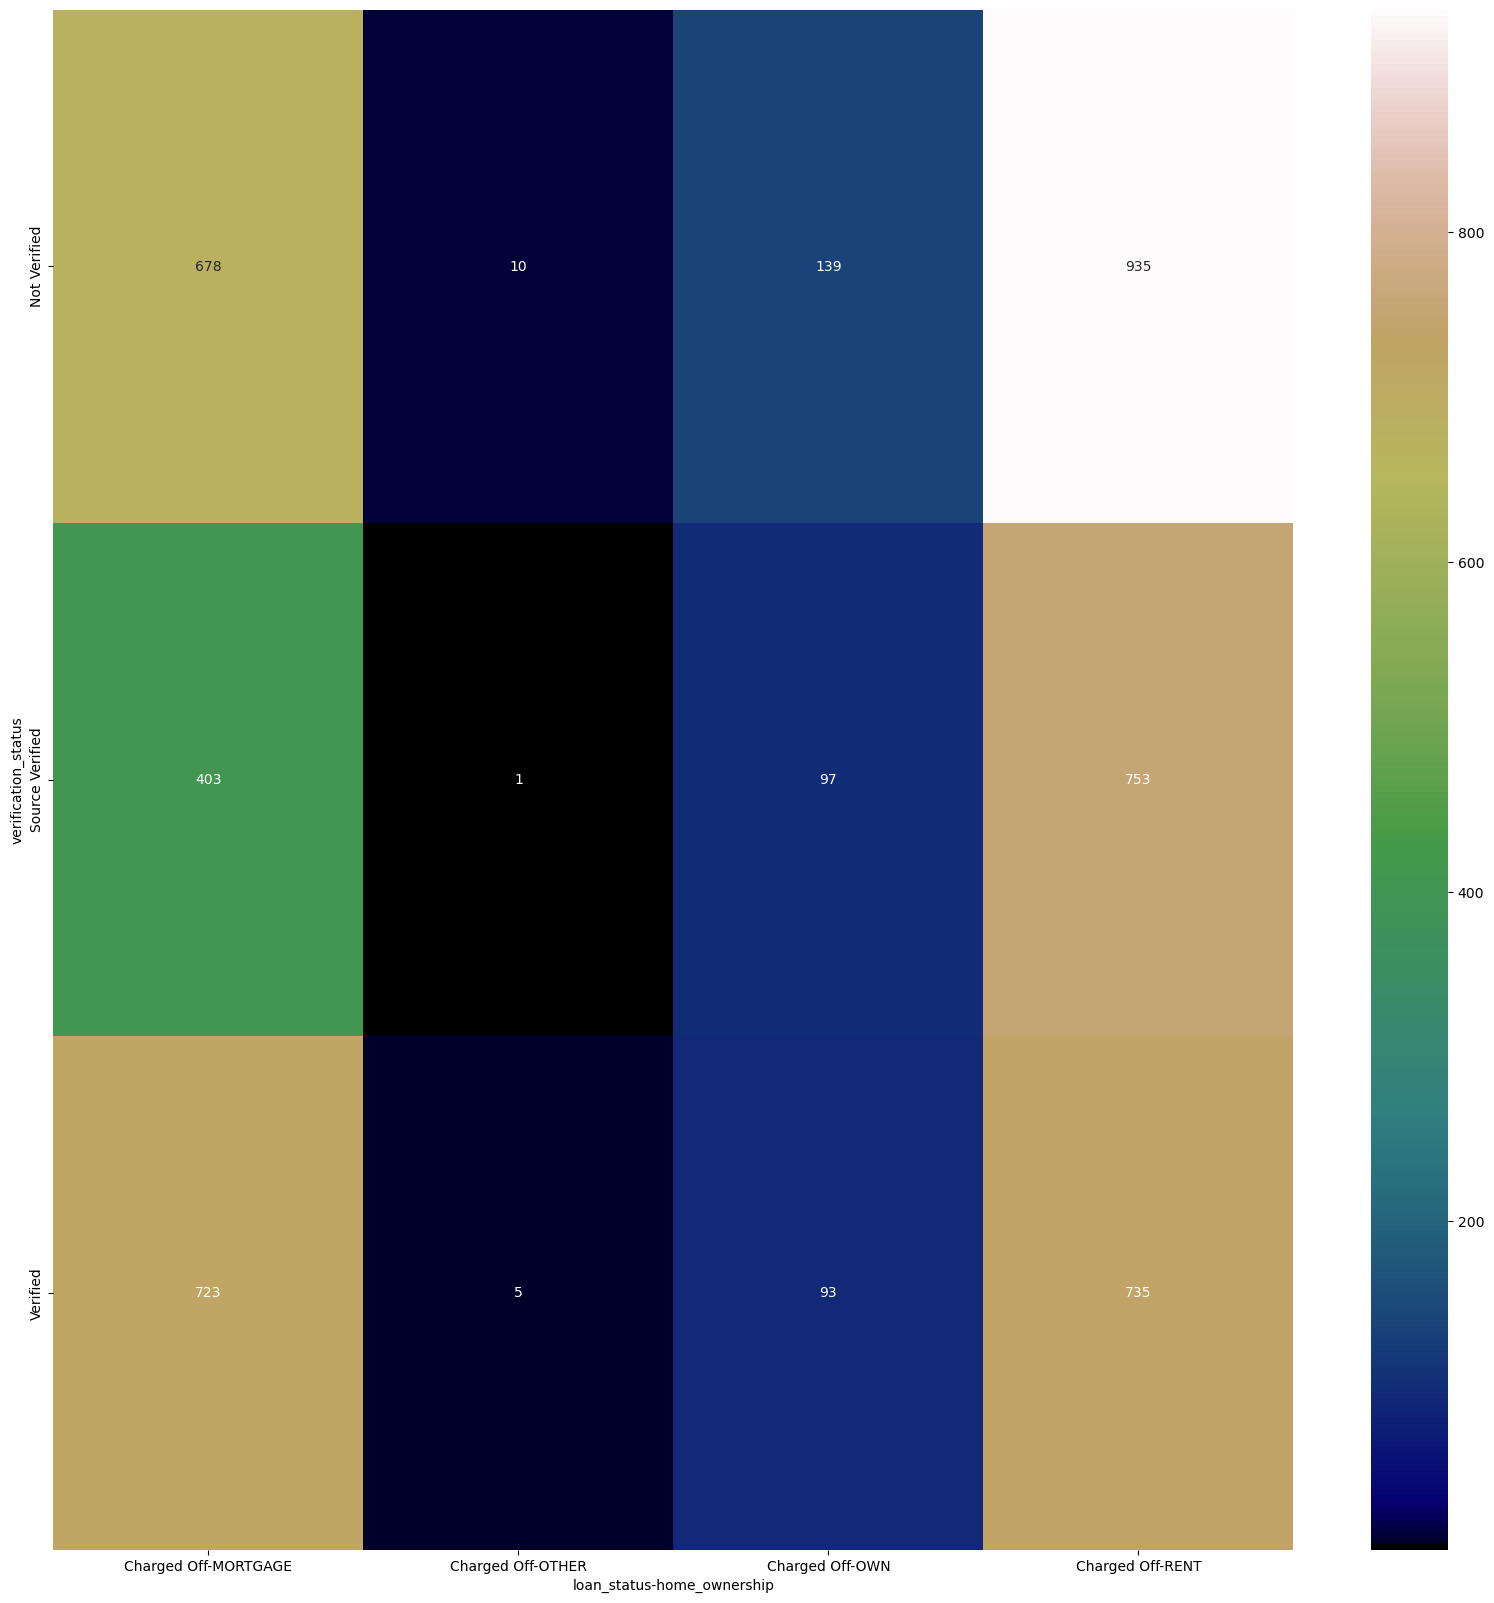

In [71]:
counts = df2.groupby(['verification_status', 'home_ownership','loan_status']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(20,20 ))
sns.heatmap(counts.pivot_table(index='verification_status', columns=['loan_status','home_ownership'], values='count'),
            cmap='gist_earth', annot=True,fmt='.0f')

# 4. Observations

The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%